In [18]:
import pandas as pd
result14=pd.read_csv('data/result2014.csv')
result14['Year']=2014
result15=pd.read_csv('data/result2015.csv')
result15['Year']=2015
result16=pd.read_csv('data/result2016.csv')
result16['Year']=2016
result17=pd.read_csv('data/result2017.csv')
result17['Year']=2017
result18=pd.read_csv('data/result2018.csv')
result18['Year']=2018
result19=pd.read_csv('data/result2019.csv')
result19['Year']=2019
result20=pd.read_csv('data/result2020.csv')
result20['Year']=2020
result21=pd.read_csv('data/result2021.csv', encoding='latin1')
result21['Year']=2021
result22=pd.read_csv('data/result2022.csv')
result22['Year']=2022
df=pd.concat([result14,result15,result16,result17,result18,result19,result20,result21,result22])

In [19]:
df.fillna(value = 0,inplace = True)
df.iloc[:,0]
columns_to_drop = [col for col in df.columns[31:] if df[col].dtype == 'object']

# Drop identified columns
new_names = {
    0: 'Round', 1: 'Pick', 2: 'Tm', 3: 'Player', 4: 'Pos', 5: 'Age', 6: 'To', 7: 'AP1', 8: 'PB', 9: 'St', 10: 'wAV',
    11: 'DrAV', 12: 'G', 13: 'Cmp', 14: 'Att', 15: 'Yds', 16: 'TD', 17: 'Int', 18: 'Att', 19: 'Yds', 20: 'TD',
    21: 'Rec', 22: 'Yds', 23: 'TD', 24: 'Solo', 25: 'Int', 26: 'Sk', 27: 'College/Univ'
}

# Retrieve the current column names
current_column_names = df.columns.tolist()

# Rename the columns by index
new_column_names = [new_names.get(i, name) for i, name in enumerate(current_column_names)]
df.columns = new_column_names

# Display the updated DataFrame
print(df.head())

  Round Pick   Tm            Player Pos Age    To AP1 PB St  ...  \
0     1    1  HOU  Jadeveon Clowney  DE  21  2023   0  3  8  ...   
1     1    2  STL     Greg Robinson   T  21  2019   0  0  5  ...   
2     1    3  JAX     Blake Bortles  QB  22  2019   0  0  5  ...   
3     1    4  BUF     Sammy Watkins  WR  21  2022   0  0  6  ...   
4     1    5  OAK       Khalil Mack  LB  23  2023   3  8  8  ...   

  (0, 'JR_Kick Ret_Avg') (0, 'JR_Kick Ret_TD') (0, 'SR_Punt Ret_Ret')  \
0                    0.0                   0.0                    0.0   
1                    0.0                   0.0                    0.0   
2                    0.0                   0.0                    0.0   
3                    0.0                   0.0                    0.0   
4                    0.0                   0.0                    0.0   

  (0, 'SR_Punt Ret_Yds') (0, 'SR_Punt Ret_Avg') (0, 'SR_Punt Ret_TD')  \
0                    0.0                    0.0                   0.0   
1     

In [20]:
df.iloc[:, 31:] = df.iloc[:, 31:].astype(float)
df = df[df.iloc[:, 0] != 'Rnd']
df.iloc[:,0]= df.iloc[:, 0].astype(float)

/var/folders/qw/m6qrt3vj0976sf8ywwy1ls_h0000gn/T/ipykernel_94746/133962605.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0]= df.iloc[:, 0].astype(float)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.14555256 0.1671159  0.15405405 0.17837838 0.15135135]
Mean CV Score: 0.15929044947912874
Training accuracy: 0.5701943844492441
Testing accuracy: 0.13822894168466524


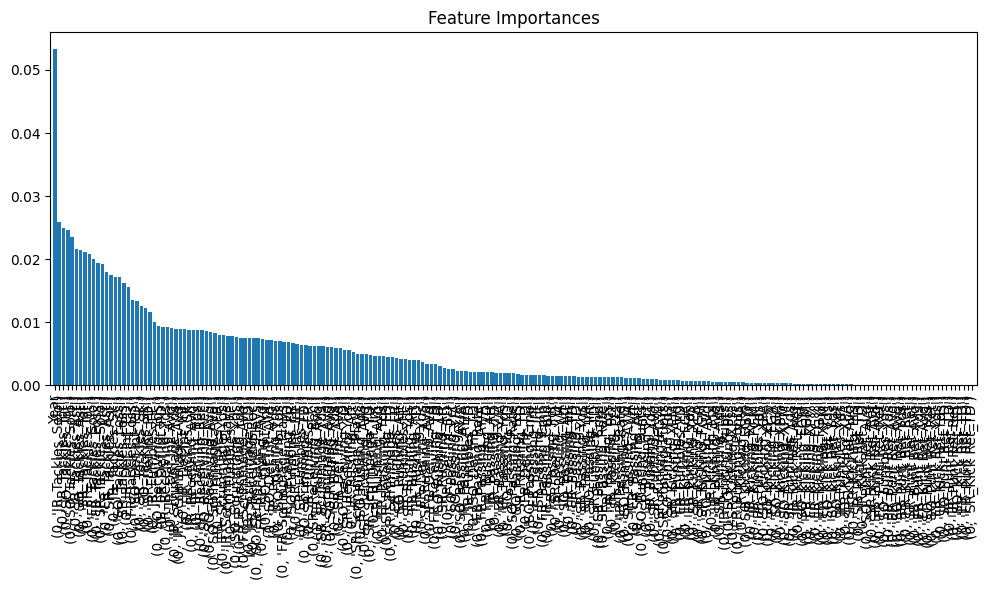

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
X = df.iloc[:,30:]
X.fillna(X.mean(), inplace=True)
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('figs/first_feature_importance.png')

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
    Dense(100, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(50, activation='relu'),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(20, activation='relu'),
    Dense(8, activation='softmax')  # Output layer with 7 neurons for 7 rounds, using softmax activation for multi-class classification
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               21400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 8)                 168       
                                                                 
Total params: 27638 (107.96 KB)
Trainable params: 27638 

Not enough samples for position group OT. Skipping...


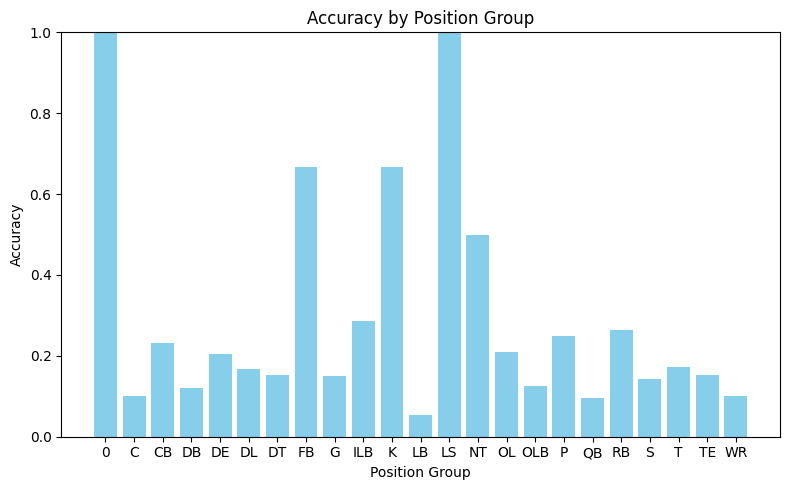

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

position_groups = df.groupby(df.iloc[:, 4])
top_features_per_group = {}
accuracy_per_group = {}

for position, group_df in position_groups:
    X = group_df.iloc[:, 31:]
    y = group_df.iloc[:, 0]
    if len(group_df) <= 1:
        print(f"Not enough samples for position group {position}. Skipping...")
        continue
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    feature_importances = model.feature_importances_
    top_feature_indices = feature_importances.argsort()[-5:][::-1]
    top_features = list(X.columns[top_feature_indices])
    top_features_per_group[position] = top_features
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_per_group[position] = accuracy
positions = list(top_features_per_group.keys())
top_features_list = list(top_features_per_group.values())
accuracies = list(accuracy_per_group.values())

plt.figure(figsize=(8, 5))
plt.bar(list(map(str, positions)), accuracies, color='skyblue')
plt.xlabel('Position Group')
plt.ylabel('Accuracy')
plt.title('Accuracy by Position Group')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('figs/first_accuracy_before_stratification.png')

In [24]:
top_features_per_group

{0: ["(0, 'SR_Kick Ret_TD')",
  "(0, 'SO_Receiving_Avg')",
  "(0, 'SO_Receiving_Rec')",
  "(0, 'SO_Rushing_TD')",
  "(0, 'SO_Rushing_Avg')"],
 'C': ["(0, 'JR_Tackles_Tot')",
  "(0, 'JR_Tackles_Solo')",
  "(0, 'SO_Tackles_Tot')",
  "(0, 'SO_Tackles_Solo')",
  "(0, 'FR_Tackles_Tot')"],
 'CB': ["(0, 'JR_Def Int_PD')",
  "(0, 'SO_Tackles_Solo')",
  "(0, 'FR_Tackles_Solo')",
  "(0, 'SO_Tackles_Tot')",
  "(0, 'JR_Tackles_Solo')"],
 'DB': ["(0, 'SR_Tackles_Tot')",
  "(0, 'JR_Tackles_Solo')",
  "(0, 'SR_Tackles_Solo')",
  "(0, 'SR_Def Int_PD')",
  "(0, 'JR_Def Int_Int')"],
 'DE': ["(0, 'JR_Tackles_Solo')",
  "(0, 'SO_Tackles_Ast')",
  "(0, 'JR_Tackles_Ast')",
  "(0, 'FR_Tackles_Loss')",
  "(0, 'SO_Tackles_Tot')"],
 'DL': ["(0, 'SO_Tackles_Loss')",
  "(0, 'FR_Tackles_Tot')",
  "(0, 'SO_Tackles_Ast')",
  "(0, 'JR_Tackles_Solo')",
  "(0, 'JR_Tackles_Sk')"],
 'DT': ["(0, 'JR_Tackles_Ast')",
  "(0, 'FR_Tackles_Tot')",
  "(0, 'SO_Tackles_Tot')",
  "(0, 'JR_Tackles_Tot')",
  "(0, 'JR_Tackles_Solo')"]

In [26]:
import re
pattern = r'\d+'
combine=pd.read_csv('data/combine2005_2023.csv', encoding='latin1')
combine.dropna(subset=['Drafted (tm/rnd/yr)'], inplace=True)

In [27]:
def drop_before_first_slash(s):
    return '/'.join(s.split('/')[1:])
combine['Drafted (tm/rnd/yr)'] = combine['Drafted (tm/rnd/yr)'].apply(drop_before_first_slash)
combine['Drafted (tm/rnd/yr)'] =combine['Drafted (tm/rnd/yr)'].apply(str).apply(lambda x: re.findall(pattern,x))
print(combine['Drafted (tm/rnd/yr)'])
combine[['Round', 'Pick', 'Year']] = pd.DataFrame(combine['Drafted (tm/rnd/yr)'].tolist(), index=combine.index)
combine.drop(columns=['Drafted (tm/rnd/yr)'], inplace=True)
#combine.head()
combine.dropna(subset=["Pick"], inplace=True)
combine = combine.apply(pd.to_numeric, errors='coerce')
combine.dtypes
combine.drop(columns=['Player','Pos','School','College','Ht','Player-additional'], inplace=True)

0       [5, 143, 2023]
1       [5, 136, 2023]
2        [3, 84, 2023]
3        [1, 23, 2023]
4       [4, 110, 2023]
             ...      
6377      [1, 7, 2005]
6378    [4, 105, 2005]
6379     [3, 72, 2005]
6381    [7, 235, 2005]
6382    [5, 172, 2005]
Name: Drafted (tm/rnd/yr), Length: 4080, dtype: object


In [28]:
df['Round'] = pd.to_numeric(df['Round'], errors='coerce')
df = df.dropna(subset=['Round'])
df['Pick'] = pd.to_numeric(df['Pick'], errors='coerce')
df = df.dropna(subset=['Pick'])
df['Round'] = df['Round'].astype('int64')
df['Pick'] = df['Pick'].astype('int64')
print(df.Year.dtype)
print(df.Round.dtype)
print(df.Pick.dtype)
print(combine.Year.dtype)
print(combine.Round.dtype)
print(combine.Pick.dtype)

int64
int64
int64
int64
int64
int64


In [29]:
df = pd.merge(df, combine, how='left', on=['Year','Round', 'Pick'])
#df= df.drop_duplicates(subset=['Round', 'Year', 'Player'], keep='first')

In [30]:
for col in df.columns[31:]:
    try:
        df[col] = pd.to_numeric(df[col])  # Attempt to convert column to numeric
    except ValueError:
        df.drop(columns=[col], inplace=True)
grouped_df = df.groupby(['Year', 'Pos'])

from sklearn.preprocessing import StandardScaler
def standardize_numeric_group(mydata):
    group = mydata.iloc[:, 31:]
    numeric_cols = group.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
    scaler = StandardScaler()
    scaled_values = scaler.fit_transform(numeric_cols)
    group[numeric_cols.columns] = scaled_values
    mydata.iloc[:, 31:] = group
    return mydata
standardized_df = grouped_df.apply(standardize_numeric_group)
print(standardized_df)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: in

      Round  Pick   Tm            Player Pos Age    To AP1 PB St  ...  \
0         1     1  HOU  Jadeveon Clowney  DE  21  2023   0  3  8  ...   
1         1     2  STL     Greg Robinson   T  21  2019   0  0  5  ...   
2         1     3  JAX     Blake Bortles  QB  22  2019   0  0  5  ...   
3         1     4  BUF     Sammy Watkins  WR  21  2022   0  0  6  ...   
4         1     5  OAK       Khalil Mack  LB  23  2023   3  8  8  ...   
...     ...   ...  ...               ...  ..  ..   ...  .. .. ..  ...   
2308      7   258  GNB      Samori Toure  WR  24  2023   0  0  0  ...   
2309      7   259  KAN    Nazeeh Johnson   S  24  2022   0  0  0  ...   
2310      7   260  LAC    Zander Horvath  RB  23  2022   0  0  0  ...   
2311      7   261  LAR         AJ Arcuri  OT  25  2022   0  0  0  ...   
2312      7   262  SFO       Brock Purdy  QB  22  2023   0  1  0  ...   

     (0, 'SR_Kick Ret_Avg') (0, 'SR_Kick Ret_TD')        Wt      40yd  \
0                   0.00000                   0.0 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/var/folders/qw/m6qrt3vj0976sf8ywwy1ls_h0000gn/T/ipykernel_94746/3338624098.py:17: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .gro

In [31]:
standardized_df.fillna(0, inplace=True)
X = standardized_df.iloc[:,31:]
X.fillna(X.mean(), inplace=True)
y = standardized_df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
standardized_df.iloc[:,0]
standardized_df.iloc[:, 4].replace({'C': 'OL', 'G': 'OL','T':'OL', 'NT':'IDL', 'DT':'IDL', 'DL':'IDL', 'DE':'EDGE', 'OLB':'EDGE', 'ILB':'LB', 'NT':'IDL', 'CB':'DB', 'S':'DB','OT':'OL'}, inplace=True)

In [33]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

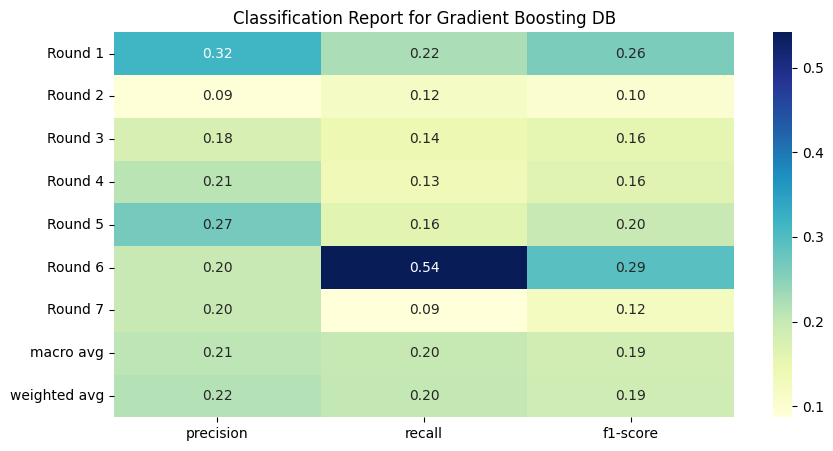

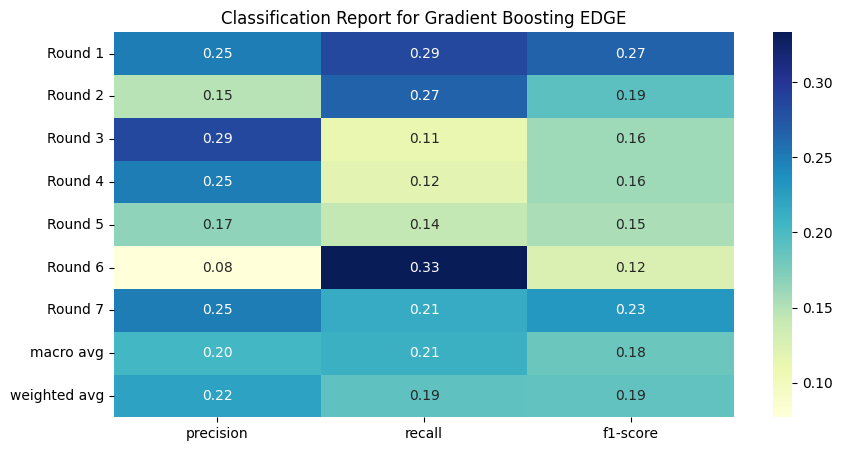

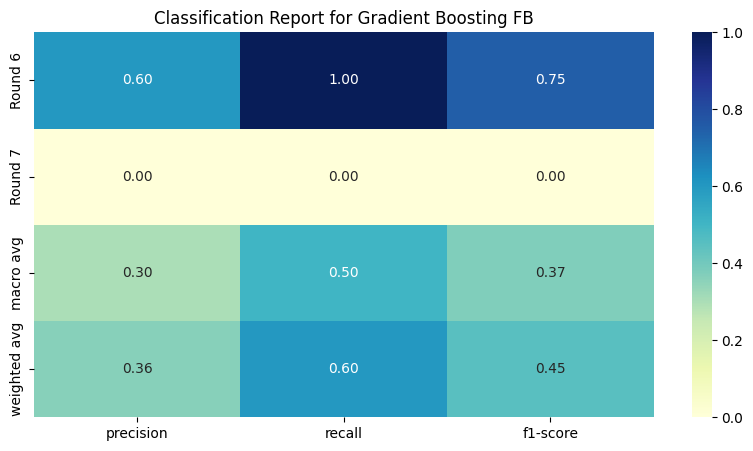

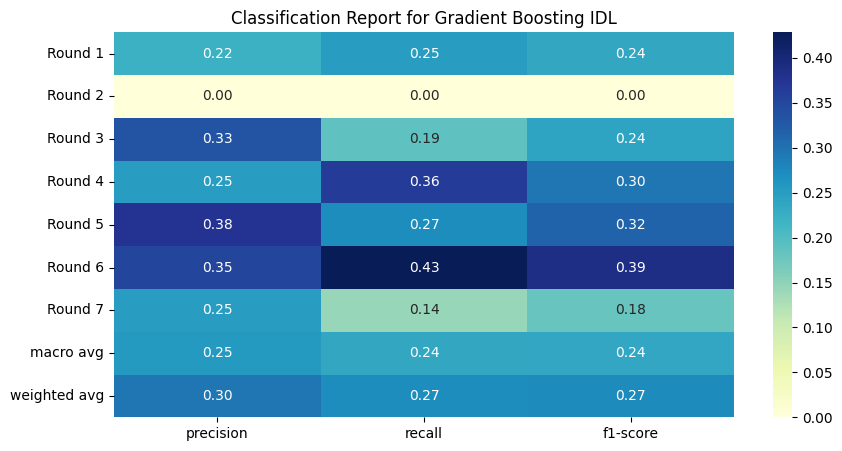

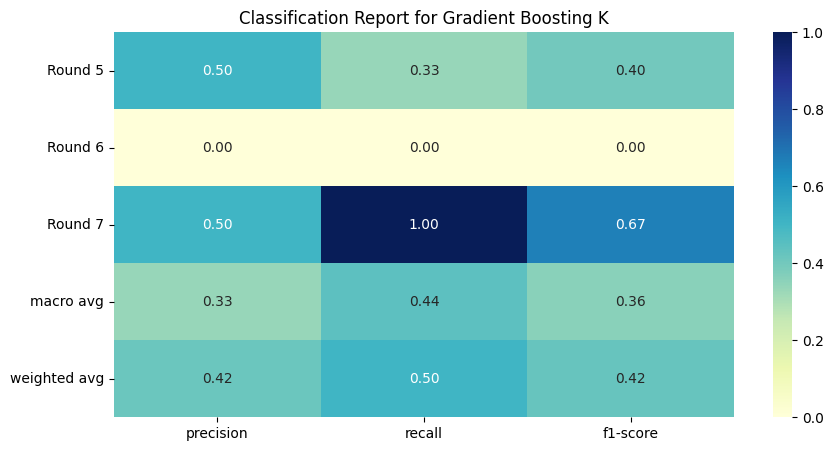

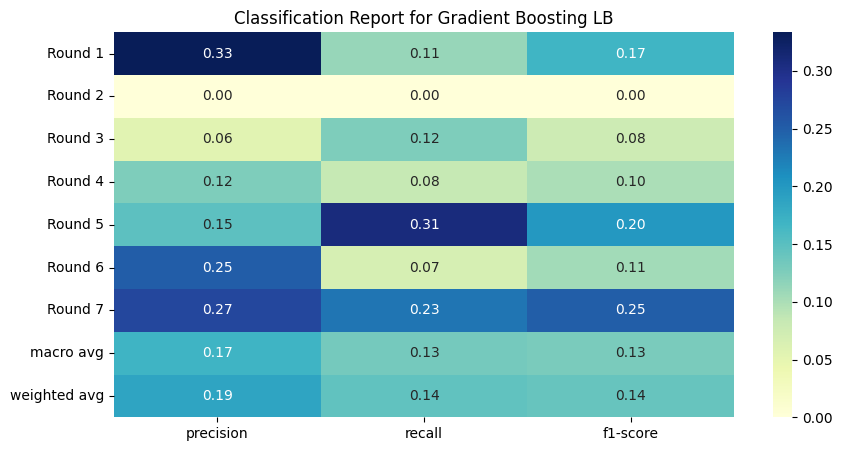

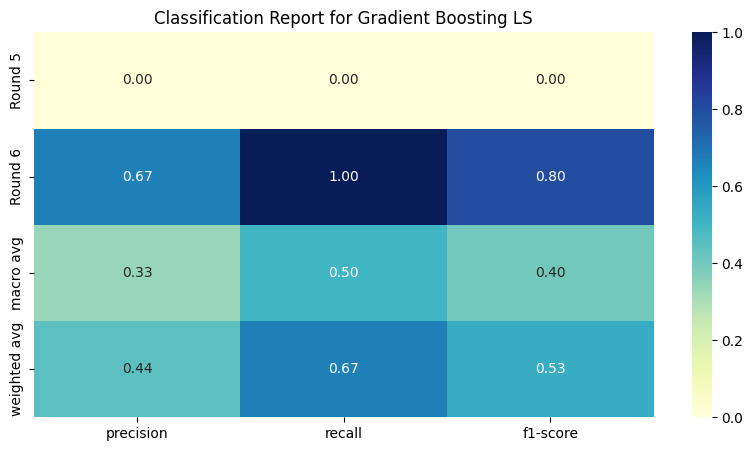

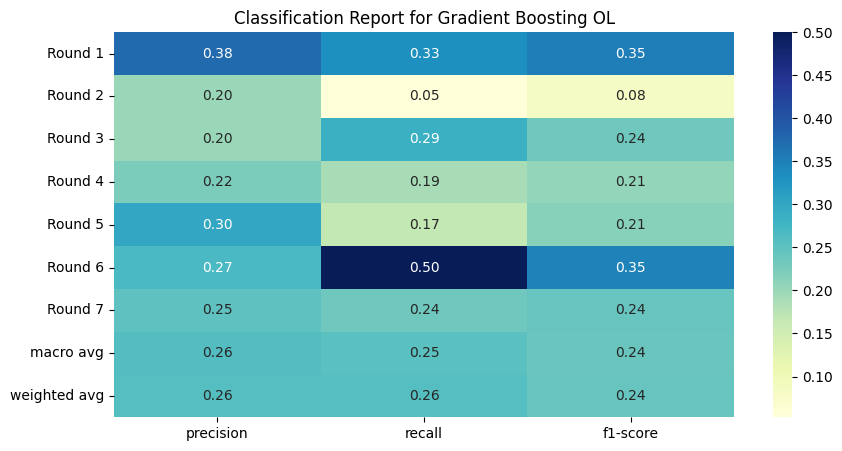

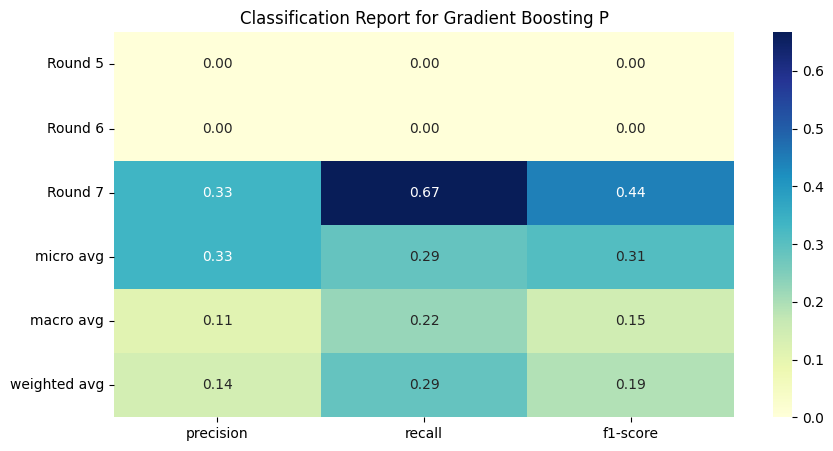

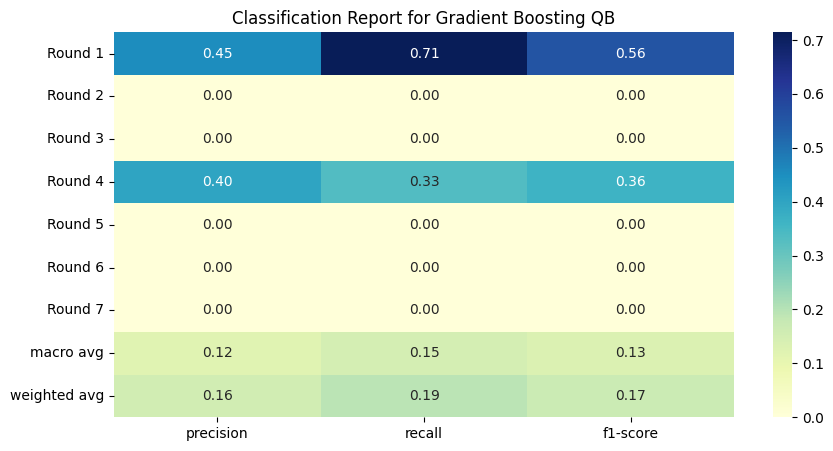

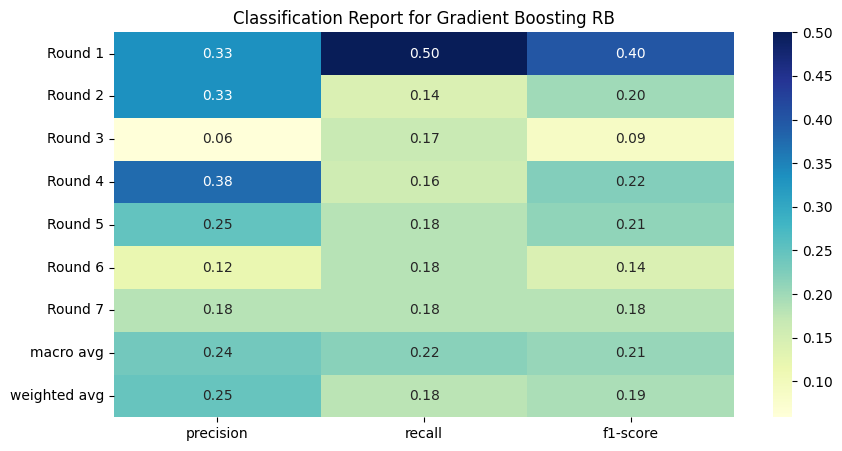

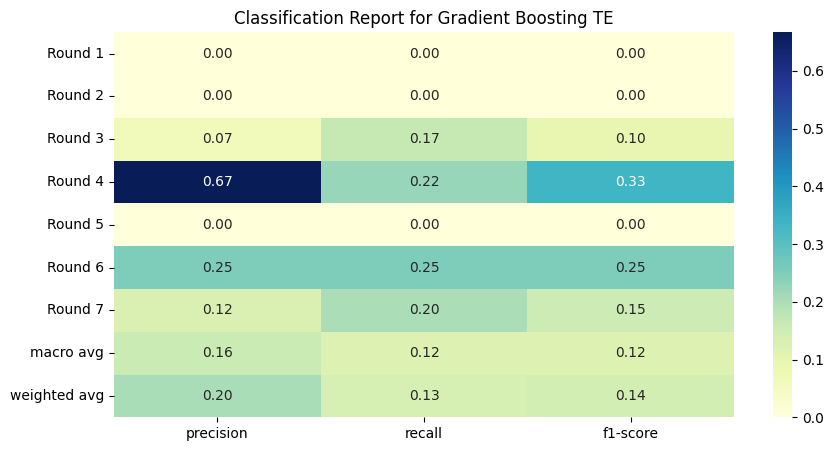

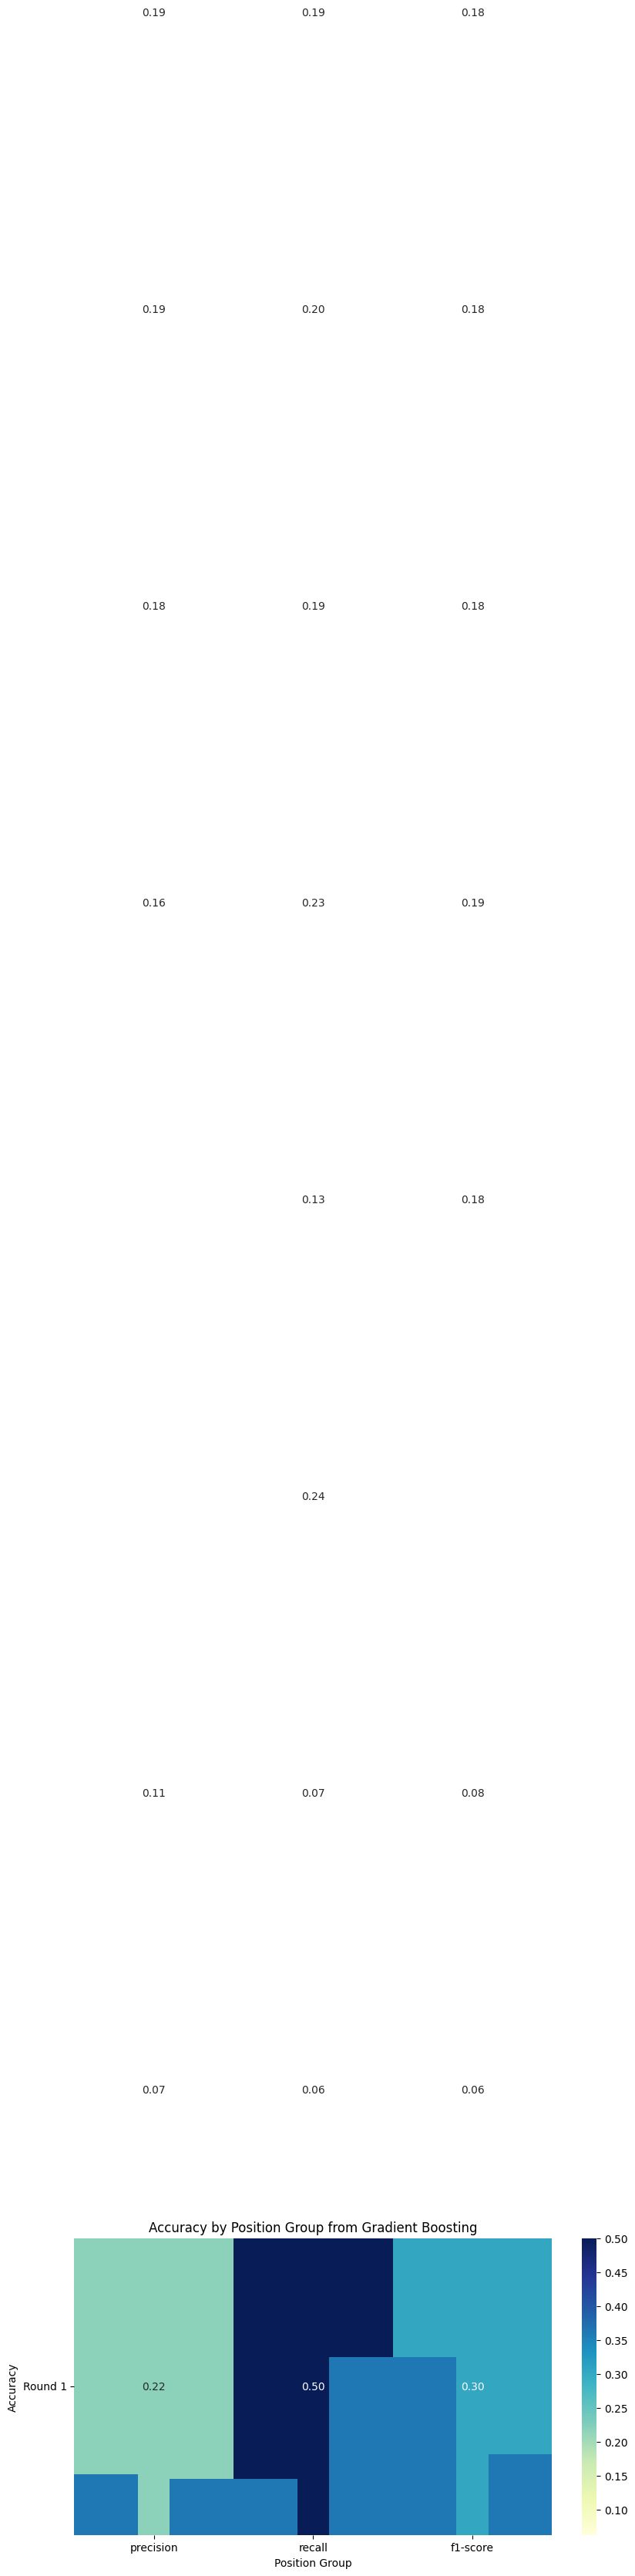

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
tab10_palette = sns.color_palette("tab10")
accuracy_per_group = {}
position_groups = standardized_df.groupby(standardized_df.iloc[:, 4])
for position, group_df in position_groups:
    X = group_df.iloc[:, 31:]
    y = group_df.iloc[:, 0]
    if len(group_df) <= 1:
        print(f"Not enough samples for position group {position}. Skipping...")
        continue
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
    gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
    gradient_booster.fit(X_train,y_train)
    y_pred = gradient_booster.predict(X_test)
    target_names = [f'Round {label}' for label in sorted(y_test.unique())]
    report = classification_report(y_test, y_pred, target_names=target_names, labels=sorted(y_test.unique()), output_dict=True)
    data = {key: report[key] for key in report.keys() if key != 'accuracy'}
    df = pd.DataFrame(data).transpose()
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.iloc[:, :3], annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f'Classification Report for Gradient Boosting {position}')
    plt.savefig(f'figs/Classification_Report_for_Gradient_Boosting_{position}.png')
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_per_group[position] = accuracy
plt.bar(list(accuracy_per_group.keys()), list(accuracy_per_group.values()), color=tab10_palette[0])
plt.xlabel('Position Group')
plt.ylabel('Accuracy')
plt.title('Accuracy by Position Group from Gradient Boosting')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('figs/Accuracy_by_Position_Group_from_Gradient_Boosting.png')

/var/folders/qw/m6qrt3vj0976sf8ywwy1ls_h0000gn/T/ipykernel_94746/1916650954.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


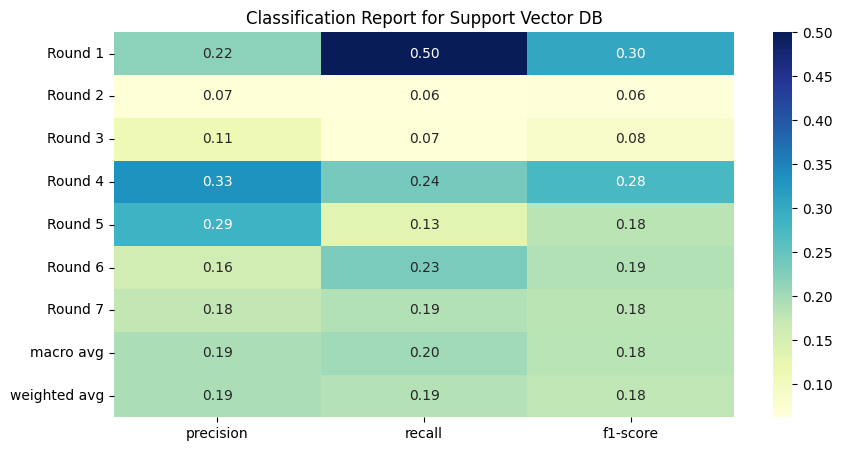

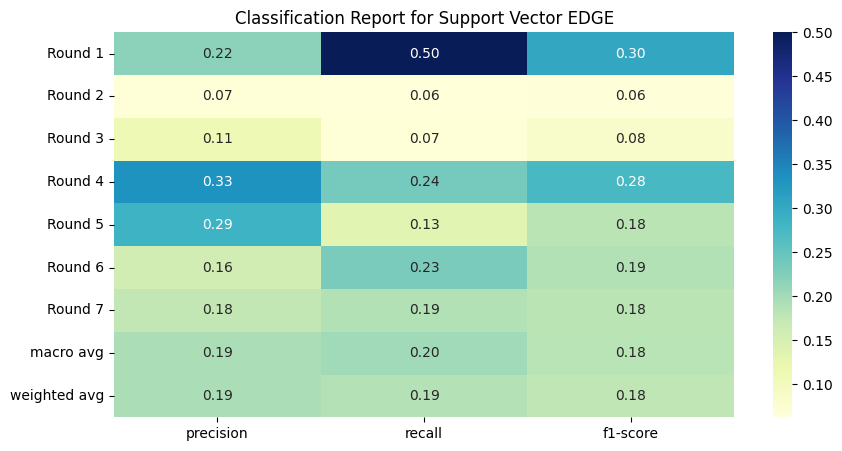

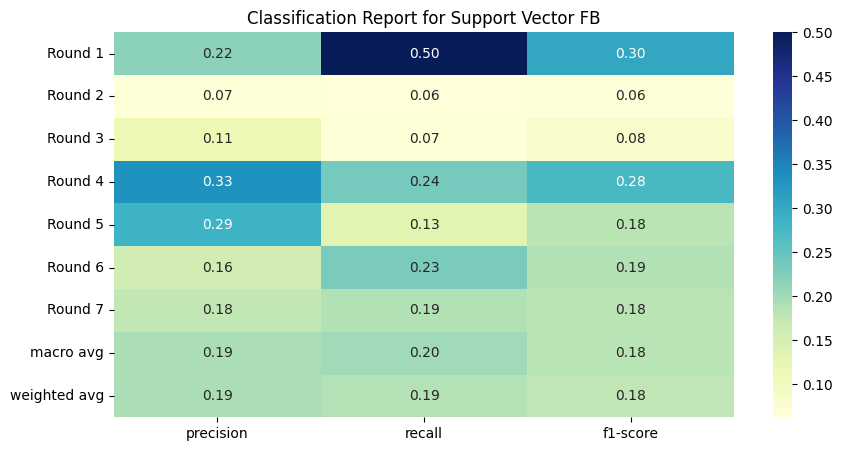

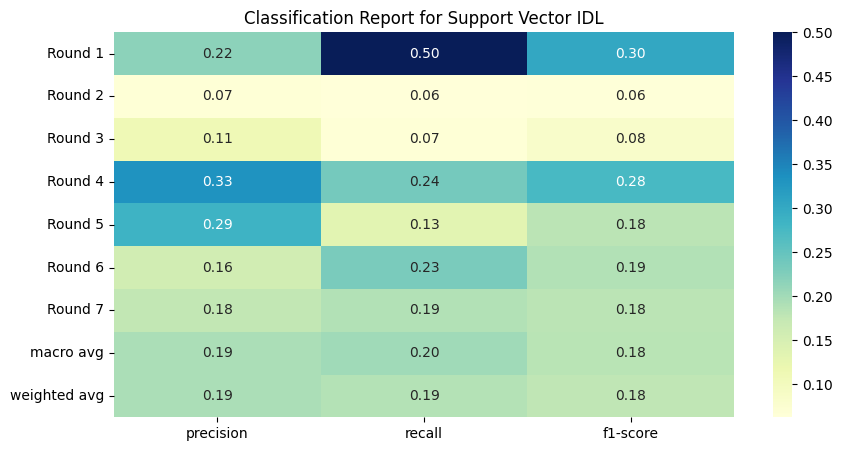

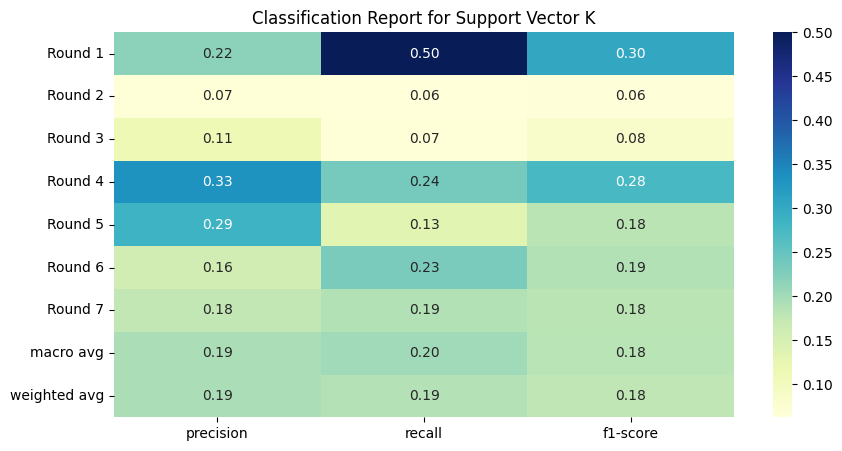

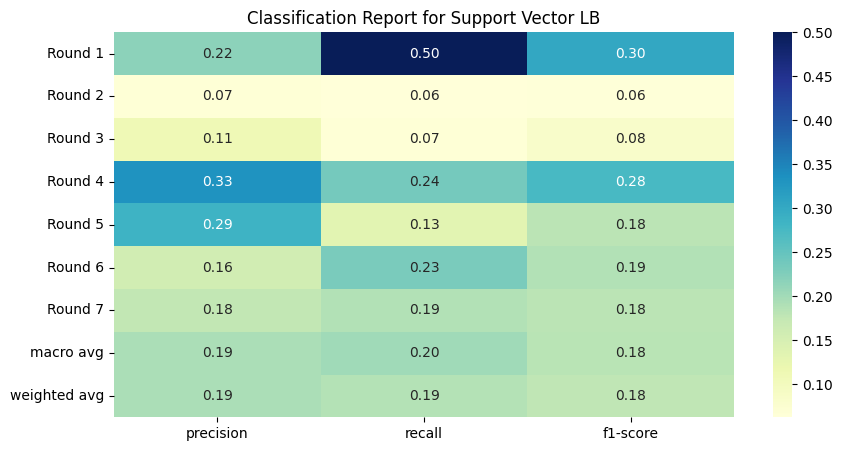

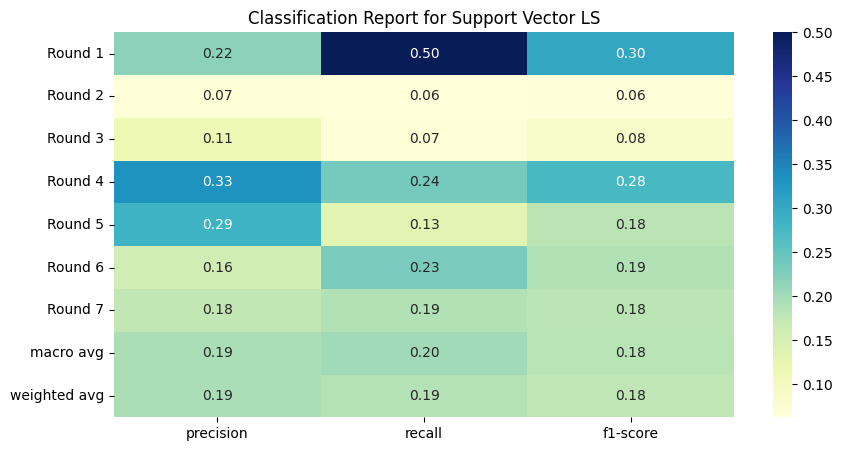

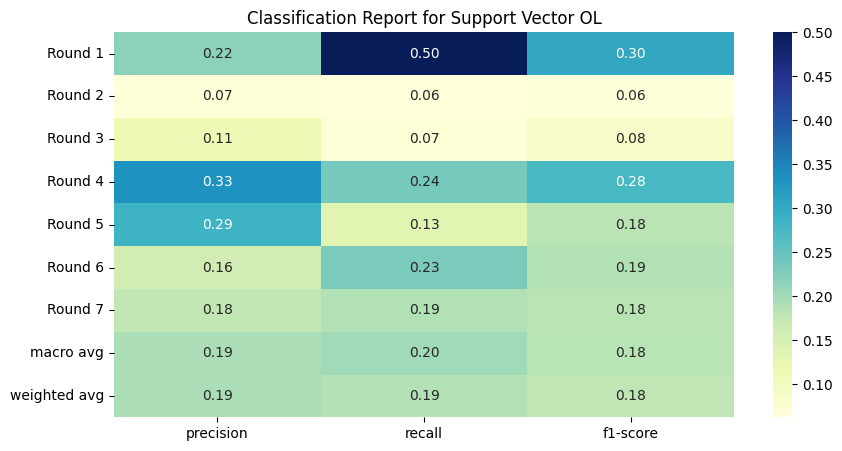

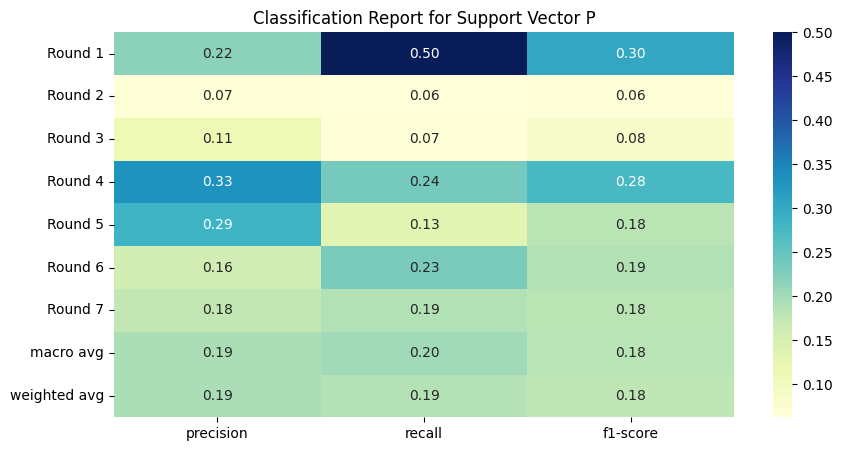

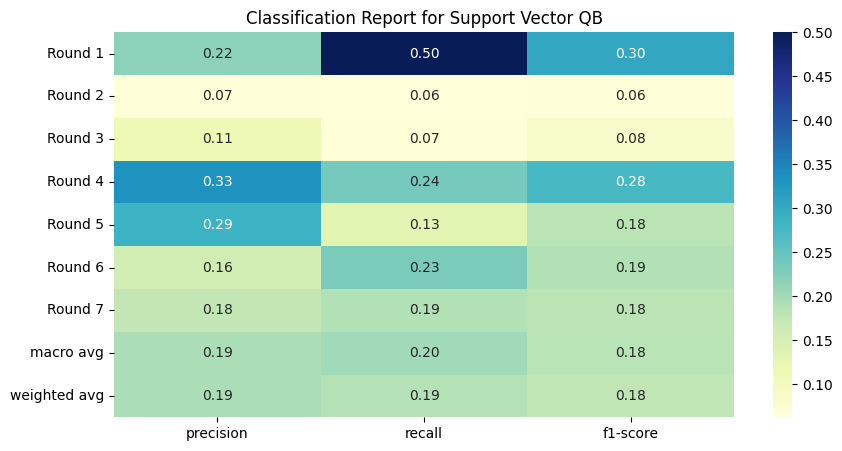

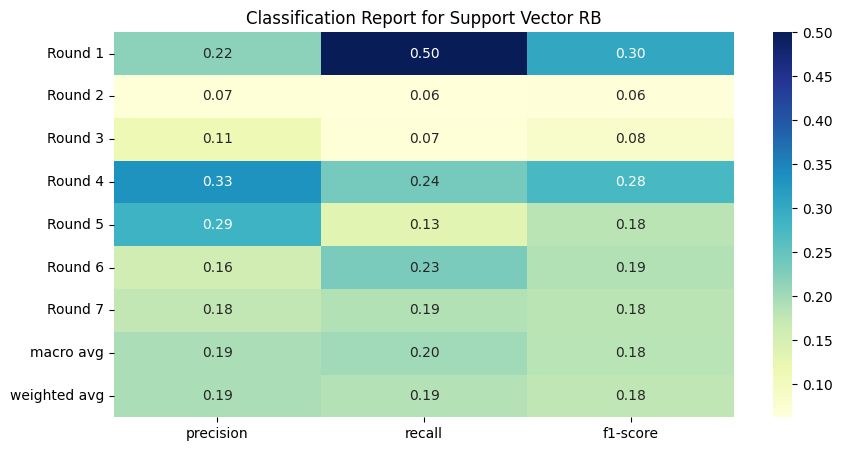

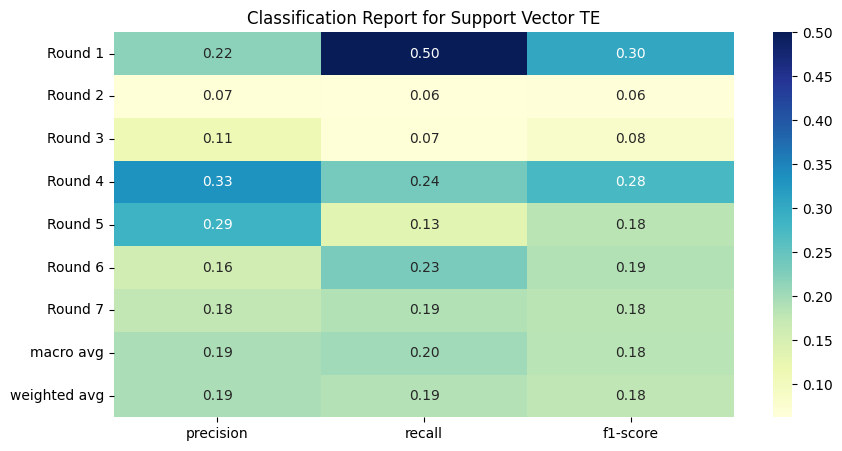

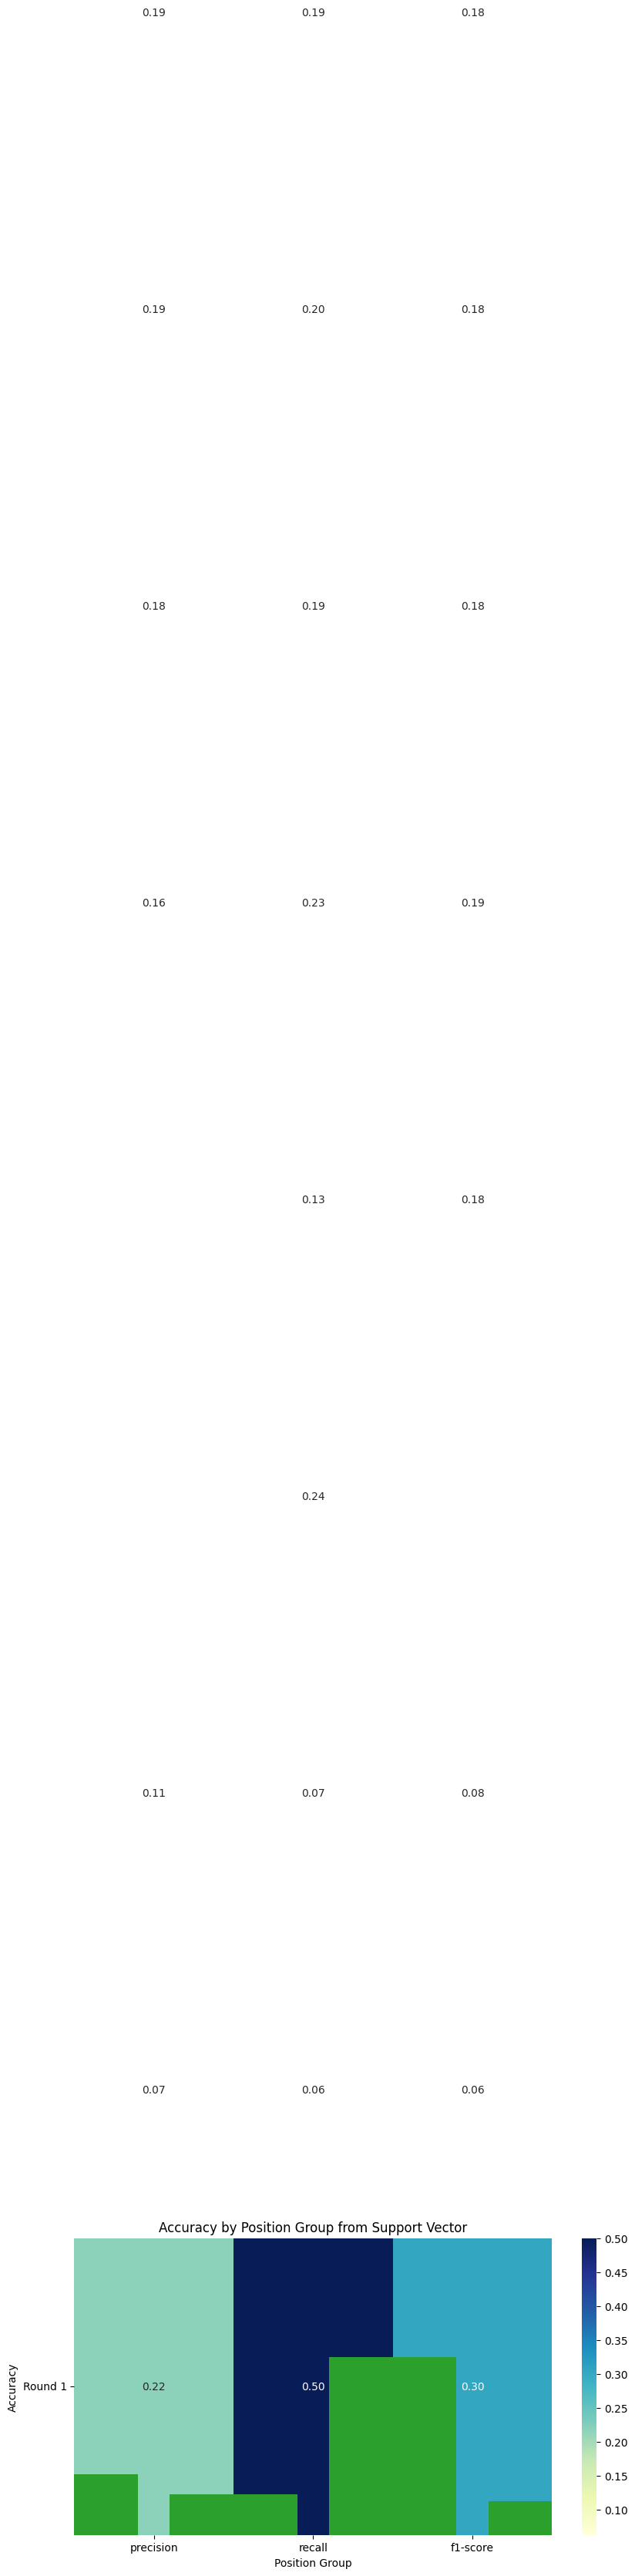

In [35]:
from sklearn.svm import SVC
accuracy_per_group = {}
position_groups = standardized_df.groupby(standardized_df.iloc[:, 4])
for position, group_df in position_groups:
    X = group_df.iloc[:, 31:]
    y = group_df.iloc[:, 0]
    if len(group_df) <= 1:
        print(f"Not enough samples for position group {position}. Skipping...")
        continue
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
    svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    target_names = [f'Round {label}' for label in sorted(y_test.unique())]
    data = {key: report[key] for key in report.keys() if key != 'accuracy'}
    df = pd.DataFrame(data).transpose()
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.iloc[:, :3], annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f'Classification Report for Support Vector {position}')
    plt.savefig(f'figs/Classification_Report_for_Support_Vector_{position}.png')
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_per_group[position] = accuracy
plt.bar(list(accuracy_per_group.keys()), list(accuracy_per_group.values()), color=tab10_palette[2])
plt.xlabel('Position Group')
plt.ylabel('Accuracy')
plt.title('Accuracy by Position Group from Support Vector')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(f'figs/Accuracy_by_Position_Group_from_Support_Vector.png')

Epoch 1/20
8/8 [==============================] - 1s 21ms/step - loss: 2.0863 - accuracy: 0.0935 - val_loss: 2.0962 - val_accuracy: 0.1935
Epoch 2/20
8/8 [==============================] - 0s 3ms/step - loss: 2.0759 - accuracy: 0.1585 - val_loss: 2.0918 - val_accuracy: 0.1613
Epoch 3/20
8/8 [==============================] - 0s 3ms/step - loss: 2.0641 - accuracy: 0.1504 - val_loss: 2.0879 - val_accuracy: 0.1452
Epoch 4/20
8/8 [==============================] - 0s 4ms/step - loss: 2.0454 - accuracy: 0.1992 - val_loss: 2.0857 - val_accuracy: 0.1613
Epoch 5/20
8/8 [==============================] - 0s 4ms/step - loss: 2.0388 - accuracy: 0.1789 - val_loss: 2.0836 - val_accuracy: 0.1613
Epoch 6/20
8/8 [==============================] - 0s 4ms/step - loss: 2.0164 - accuracy: 0.2033 - val_loss: 2.0907 - val_accuracy: 0.1452
Epoch 7/20
8/8 [==============================] - 0s 4ms/step - loss: 1.9917 - accuracy: 0.2561 - val_loss: 2.0990 - val_accuracy: 0.1452
Epoch 8/20
8/8 [=================

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Epoch 1/20
5/5 [==============================] - 0s 18ms/step - loss: 2.2255 - accuracy: 0.2143 - val_loss: 2.1565 - val_accuracy: 0.3143
Epoch 2/20
5/5 [==============================] - 0s 5ms/step - loss: 2.0544 - accuracy: 0.2286 - val_loss: 2.1132 - val_accuracy: 0.2857
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 1.8572 - accuracy: 0.2357 - val_loss: 2.1112 - val_accuracy: 0.2571
Epoch 4/20
5/5 [==============================] - 0s 5ms/step - loss: 1.7789 - accuracy: 0.2929 - val_loss: 2.1558 - val_accuracy: 0.2857
Epoch 5/20
5/5 [==============================] - 0s 5ms/step - loss: 1.7661 - accuracy: 0.3071 - val_loss: 2.2007 - val_accuracy: 0.2286
Epoch 6/20
5/5 [==============================] - 0s 5ms/step - loss: 1.6929 - accuracy: 0.3214 - val_loss: 2.2168 - val_accuracy: 0.2571
Epoch 7/20
5/5 [==============================] - 0s 5ms/step - loss: 1.6301 - accuracy: 0.3714 - val_loss: 2.2238 - val_accuracy: 0.2571
Epoch 8/20
5/5 [=================

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Epoch 1/20
4/4 [==============================] - 0s 22ms/step - loss: 2.8387 - accuracy: 0.1154 - val_loss: 2.6686 - val_accuracy: 0.0769
Epoch 2/20
4/4 [==============================] - 0s 6ms/step - loss: 2.4078 - accuracy: 0.2019 - val_loss: 2.5844 - val_accuracy: 0.0769
Epoch 3/20
4/4 [==============================] - 0s 6ms/step - loss: 2.1978 - accuracy: 0.1923 - val_loss: 2.5619 - val_accuracy: 0.1154
Epoch 4/20
4/4 [==============================] - 0s 6ms/step - loss: 2.0556 - accuracy: 0.1923 - val_loss: 2.4954 - val_accuracy: 0.1154
Epoch 5/20
4/4 [==============================] - 0s 6ms/step - loss: 1.8498 - accuracy: 0.2212 - val_loss: 2.4190 - val_accuracy: 0.1538
Epoch 6/20
4/4 [==============================] - 0s 6ms/step - loss: 1.8627 - accuracy: 0.2788 - val_loss: 2.3559 - val_accuracy: 0.1538
Epoch 7/20
4/4 [==============================] - 0s 6ms/step - loss: 1.7529 - accuracy: 0.2981 - val_loss: 2.3051 - val_accuracy: 0.1154
Epoch 8/20
4/4 [=================

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Epoch 1/20
4/4 [==============================] - 0s 22ms/step - loss: 2.8634 - accuracy: 0.1875 - val_loss: 2.6772 - val_accuracy: 0.0345
Epoch 2/20
4/4 [==============================] - 0s 6ms/step - loss: 2.5660 - accuracy: 0.2321 - val_loss: 2.3989 - val_accuracy: 0.0345
Epoch 3/20
4/4 [==============================] - 0s 6ms/step - loss: 2.2158 - accuracy: 0.2768 - val_loss: 2.2912 - val_accuracy: 0.0690
Epoch 4/20
4/4 [==============================] - 0s 6ms/step - loss: 2.0552 - accuracy: 0.2589 - val_loss: 2.2172 - val_accuracy: 0.0690
Epoch 5/20
4/4 [==============================] - 0s 6ms/step - loss: 1.8879 - accuracy: 0.3036 - val_loss: 2.1585 - val_accuracy: 0.0690
Epoch 6/20
4/4 [==============================] - 0s 6ms/step - loss: 1.8116 - accuracy: 0.2768 - val_loss: 2.1134 - val_accuracy: 0.0345
Epoch 7/20
4/4 [==============================] - 0s 6ms/step - loss: 1.7535 - accuracy: 0.3214 - val_loss: 2.0924 - val_accuracy: 0.0345
Epoch 8/20
4/4 [=================

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

Epoch 1/20
7/7 [==============================] - 0s 15ms/step - loss: 2.5655 - accuracy: 0.1900 - val_loss: 2.4110 - val_accuracy: 0.2000
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 2.1860 - accuracy: 0.1900 - val_loss: 2.2247 - val_accuracy: 0.1400
Epoch 3/20
7/7 [==============================] - 0s 4ms/step - loss: 1.9414 - accuracy: 0.2500 - val_loss: 2.1631 - val_accuracy: 0.1600
Epoch 4/20
7/7 [==============================] - 0s 4ms/step - loss: 1.8817 - accuracy: 0.2650 - val_loss: 2.1357 - val_accuracy: 0.1600
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 1.8150 - accuracy: 0.2800 - val_loss: 2.1160 - val_accuracy: 0.1800
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 1.8056 - accuracy: 0.3050 - val_loss: 2.1092 - val_accuracy: 0.1400
Epoch 7/20
7/7 [==============================] - 0s 4ms/step - loss: 1.7488 - accuracy: 0.3150 - val_loss: 2.1154 - val_accuracy: 0.1400
Epoch 8/20
7/7 [=================

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Epoch 1/20
2/2 [==============================] - 0s 67ms/step - loss: 2.4637 - accuracy: 0.1538 - val_loss: 2.1986 - val_accuracy: 0.3571
Epoch 2/20
2/2 [==============================] - 0s 16ms/step - loss: 2.0771 - accuracy: 0.2308 - val_loss: 2.0885 - val_accuracy: 0.3571
Epoch 3/20
2/2 [==============================] - 0s 16ms/step - loss: 1.8791 - accuracy: 0.2308 - val_loss: 1.9398 - val_accuracy: 0.3571
Epoch 4/20
2/2 [==============================] - 0s 15ms/step - loss: 1.7092 - accuracy: 0.3654 - val_loss: 1.8514 - val_accuracy: 0.3571
Epoch 5/20
2/2 [==============================] - 0s 15ms/step - loss: 1.4942 - accuracy: 0.4038 - val_loss: 1.7979 - val_accuracy: 0.3571
Epoch 6/20
2/2 [==============================] - 0s 16ms/step - loss: 1.4911 - accuracy: 0.4038 - val_loss: 1.7758 - val_accuracy: 0.3571
Epoch 7/20
2/2 [==============================] - 0s 15ms/step - loss: 1.5360 - accuracy: 0.4231 - val_loss: 1.7682 - val_accuracy: 0.3571
Epoch 8/20
2/2 [===========

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Epoch 1/20
4/4 [==============================] - 0s 25ms/step - loss: 2.3864 - accuracy: 0.1939 - val_loss: 2.4988 - val_accuracy: 0.2400
Epoch 2/20
4/4 [==============================] - 0s 6ms/step - loss: 2.0866 - accuracy: 0.2449 - val_loss: 2.2532 - val_accuracy: 0.2000
Epoch 3/20
4/4 [==============================] - 0s 6ms/step - loss: 2.0318 - accuracy: 0.1939 - val_loss: 2.1332 - val_accuracy: 0.2000
Epoch 4/20
4/4 [==============================] - 0s 6ms/step - loss: 1.9230 - accuracy: 0.2143 - val_loss: 2.0418 - val_accuracy: 0.2000
Epoch 5/20
4/4 [==============================] - 0s 6ms/step - loss: 1.7665 - accuracy: 0.2245 - val_loss: 2.0048 - val_accuracy: 0.1600
Epoch 6/20
4/4 [==============================] - 0s 6ms/step - loss: 1.7323 - accuracy: 0.2449 - val_loss: 2.0552 - val_accuracy: 0.0800
Epoch 7/20
4/4 [==============================] - 0s 6ms/step - loss: 1.7368 - accuracy: 0.2653 - val_loss: 2.1594 - val_accuracy: 0.1200
Epoch 8/20
4/4 [=================

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Epoch 1/20
3/3 [==============================] - 0s 33ms/step - loss: 2.1376 - accuracy: 0.1970 - val_loss: 2.0151 - val_accuracy: 0.1765
Epoch 2/20
3/3 [==============================] - 0s 9ms/step - loss: 2.2173 - accuracy: 0.1364 - val_loss: 1.9513 - val_accuracy: 0.1765
Epoch 3/20
3/3 [==============================] - 0s 9ms/step - loss: 2.1289 - accuracy: 0.1667 - val_loss: 1.8822 - val_accuracy: 0.2353
Epoch 4/20
3/3 [==============================] - 0s 9ms/step - loss: 2.0709 - accuracy: 0.1212 - val_loss: 1.8022 - val_accuracy: 0.2353
Epoch 5/20
3/3 [==============================] - 0s 9ms/step - loss: 1.9833 - accuracy: 0.2727 - val_loss: 1.7458 - val_accuracy: 0.2941
Epoch 6/20
3/3 [==============================] - 0s 9ms/step - loss: 1.9050 - accuracy: 0.2424 - val_loss: 1.7123 - val_accuracy: 0.2941
Epoch 7/20
3/3 [==============================] - 0s 9ms/step - loss: 1.8448 - accuracy: 0.2424 - val_loss: 1.7009 - val_accuracy: 0.2353
Epoch 8/20
3/3 [=================

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Epoch 1/20
5/5 [==============================] - 0s 22ms/step - loss: 2.2567 - accuracy: 0.1722 - val_loss: 2.2380 - val_accuracy: 0.1579
Epoch 2/20
5/5 [==============================] - 0s 5ms/step - loss: 2.1545 - accuracy: 0.1656 - val_loss: 2.1395 - val_accuracy: 0.1316
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 1.9330 - accuracy: 0.2318 - val_loss: 2.0840 - val_accuracy: 0.1316
Epoch 4/20
5/5 [==============================] - 0s 5ms/step - loss: 1.9040 - accuracy: 0.2583 - val_loss: 2.0556 - val_accuracy: 0.0789
Epoch 5/20
5/5 [==============================] - 0s 5ms/step - loss: 1.8164 - accuracy: 0.2980 - val_loss: 2.0562 - val_accuracy: 0.0789
Epoch 6/20
5/5 [==============================] - 0s 5ms/step - loss: 1.7423 - accuracy: 0.2848 - val_loss: 2.0661 - val_accuracy: 0.1053
Epoch 7/20
5/5 [==============================] - 0s 5ms/step - loss: 1.7380 - accuracy: 0.2781 - val_loss: 2.0716 - val_accuracy: 0.1053
Epoch 8/20
5/5 [=================

/var/folders/qw/m6qrt3vj0976sf8ywwy1ls_h0000gn/T/ipykernel_94746/1906757419.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


Testing Accuracy: 0.1771058291196823


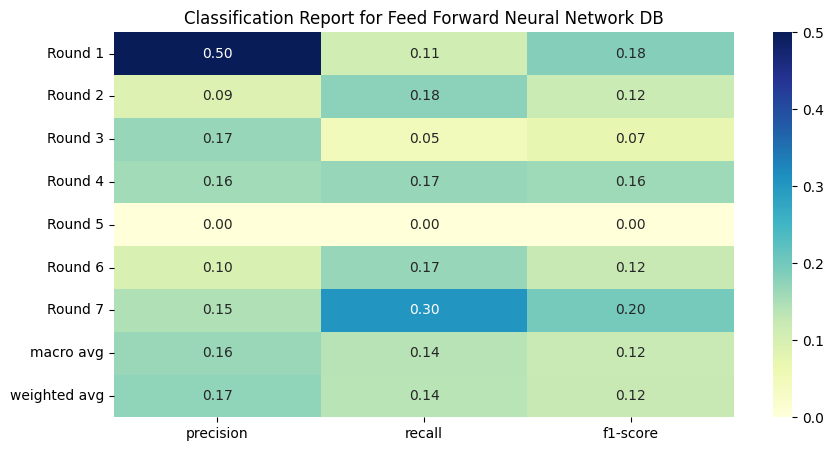

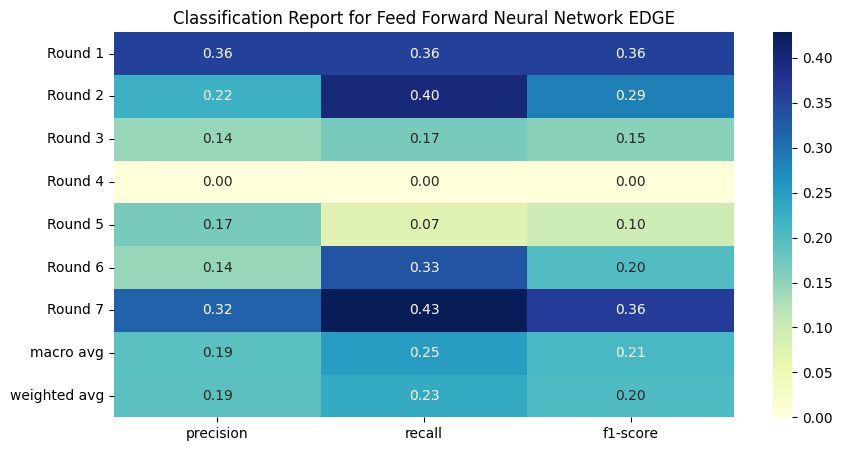

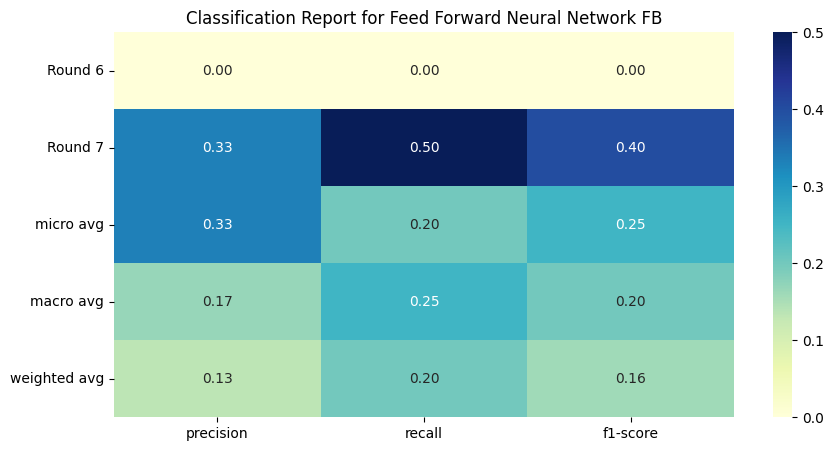

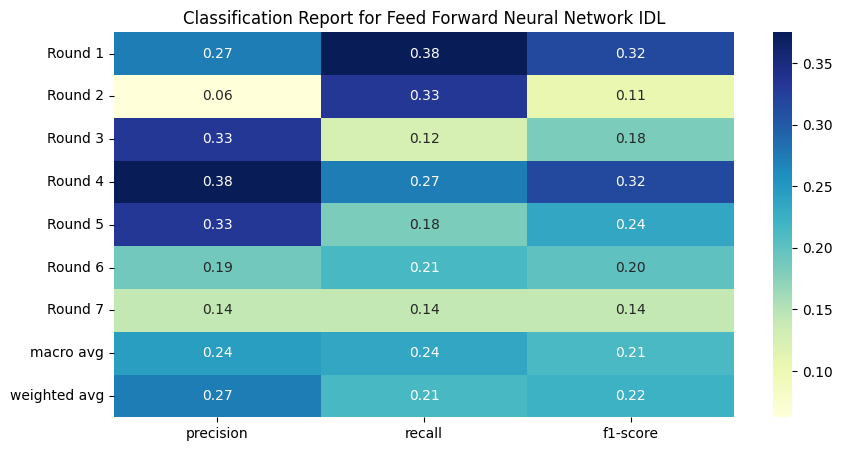

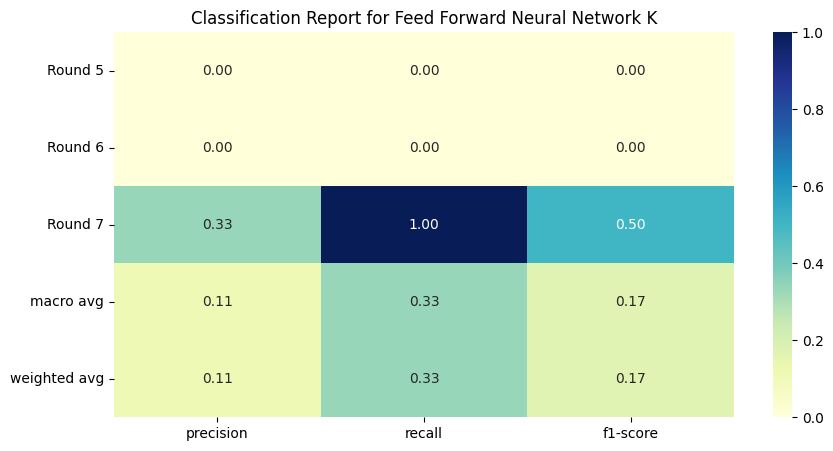

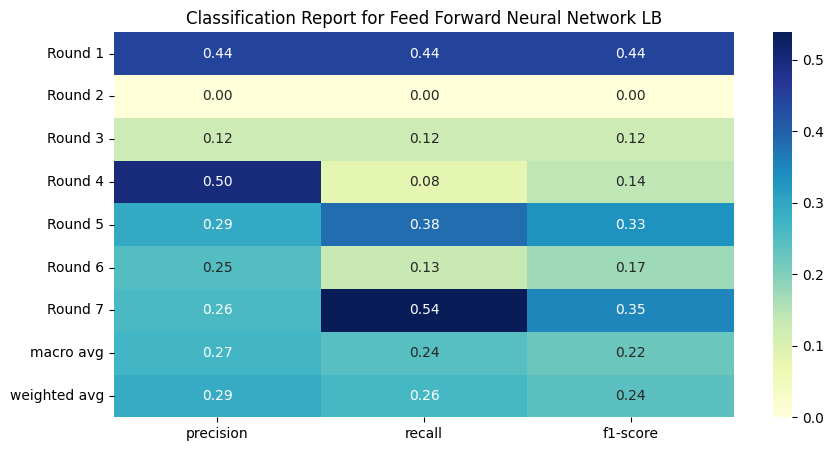

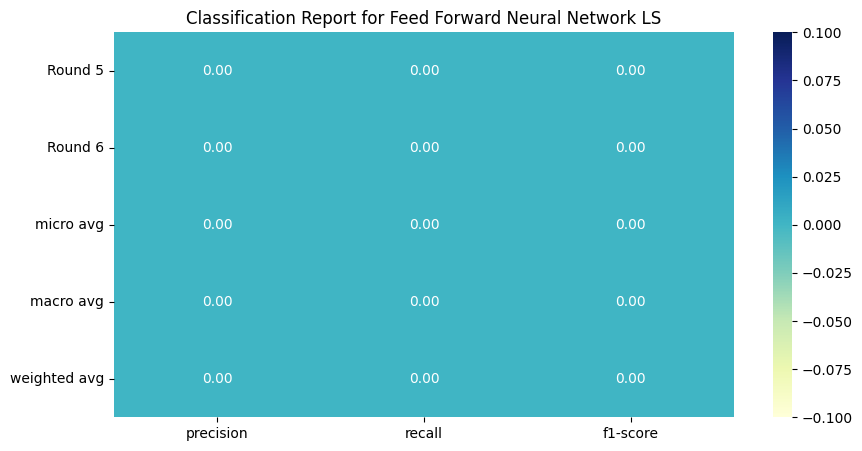

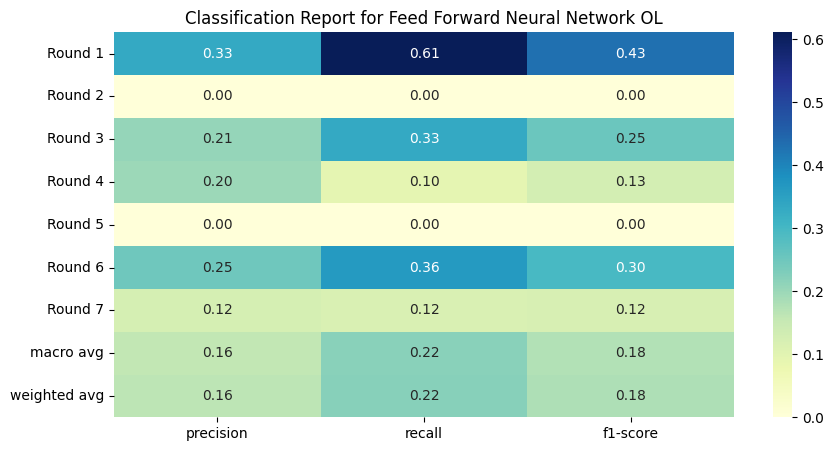

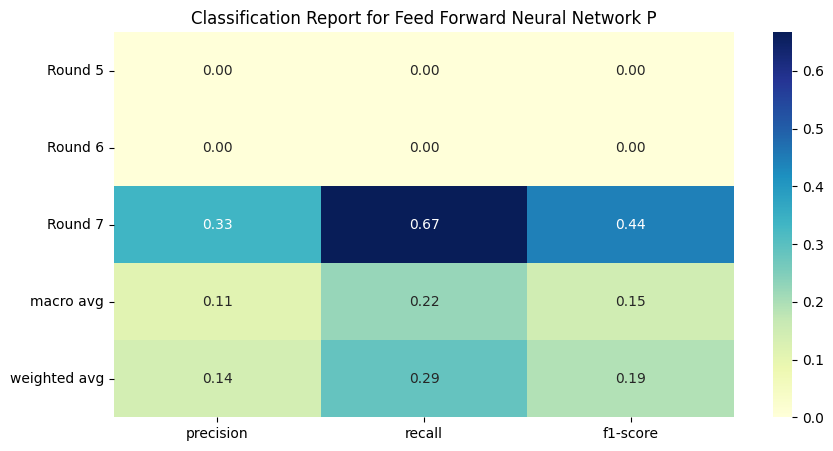

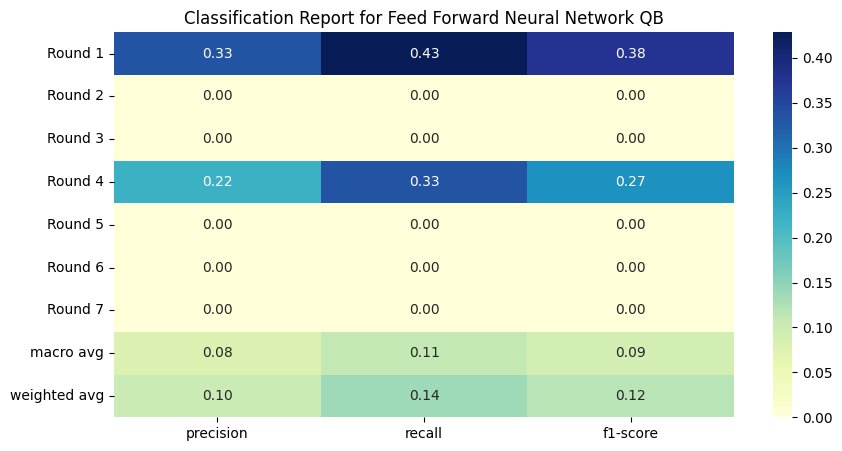

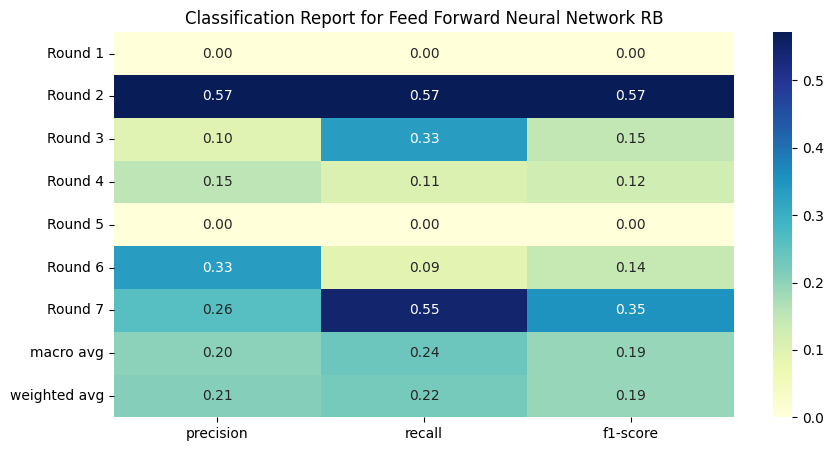

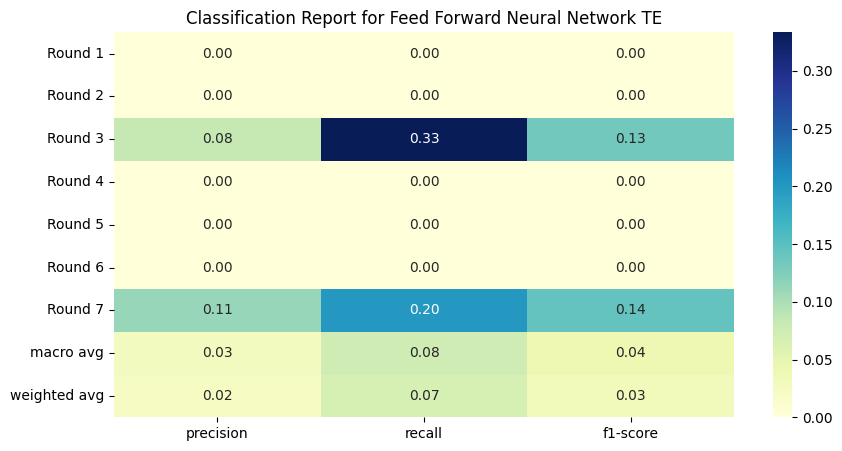

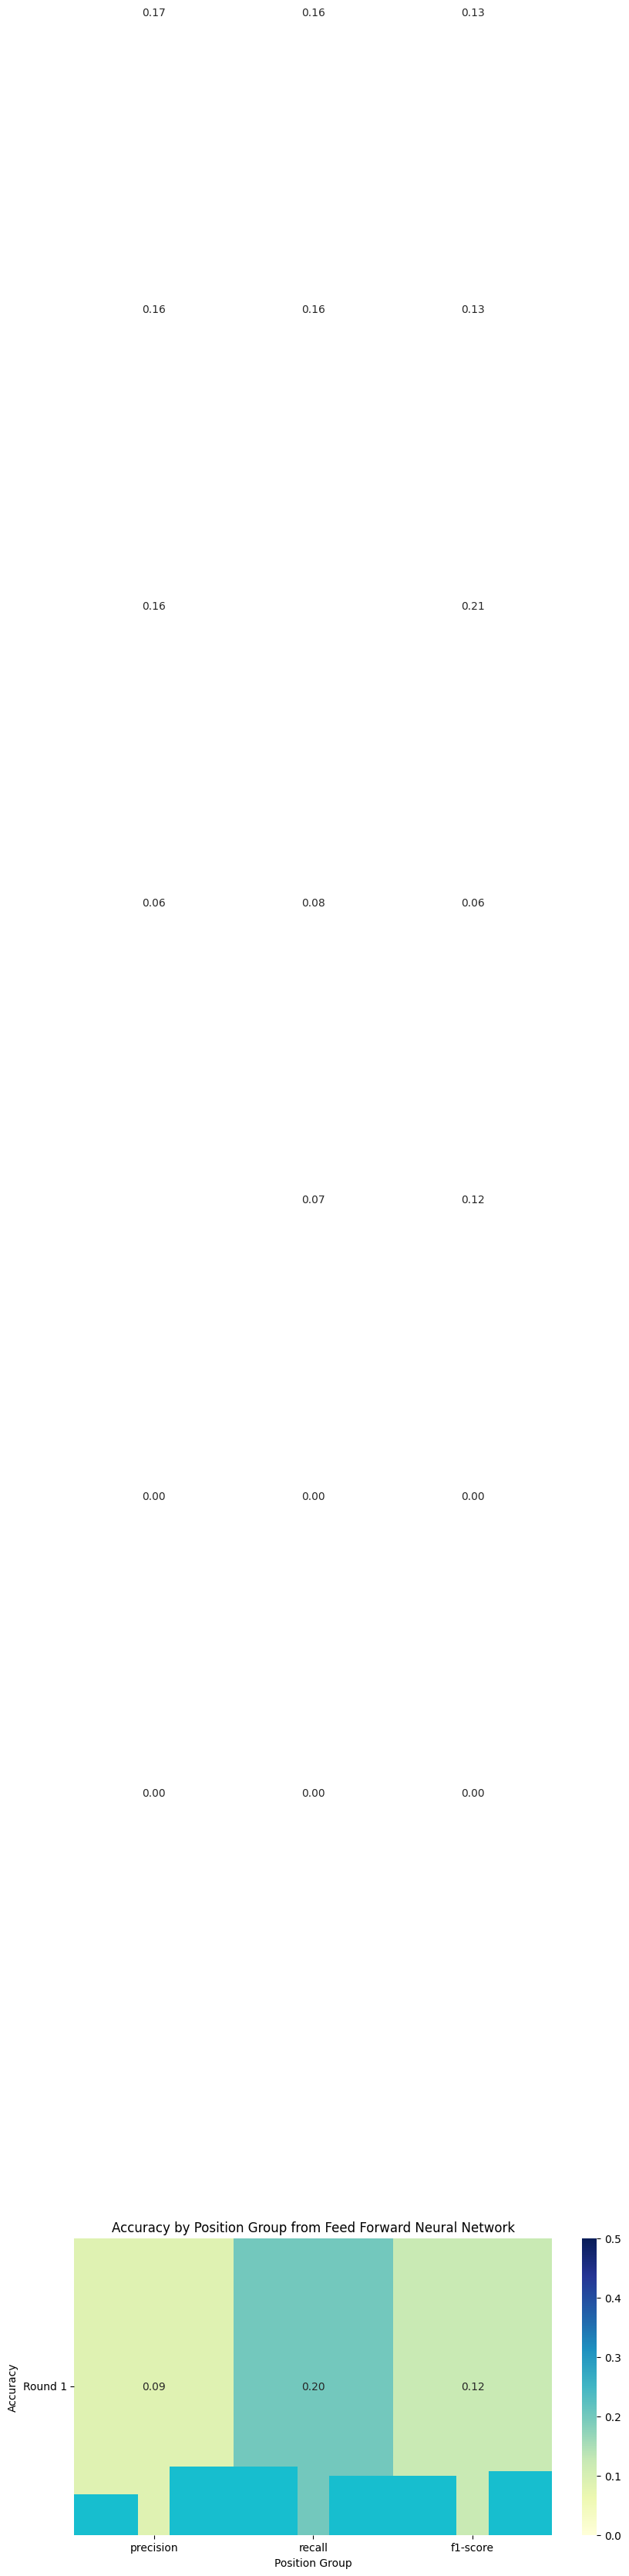

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential([
    Dense(100, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(50, activation='relu'),
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(20, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(8, activation='softmax')  # Output layer with 7 neurons for 7 rounds, using softmax activation for multi-class classification
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
accuracy_per_group = {}
position_groups = standardized_df.groupby(standardized_df.iloc[:, 4])
for position, group_df in position_groups:
    X = group_df.iloc[:, 31:]
    y = group_df.iloc[:, 0]
    if len(group_df) <= 1:
        print(f"Not enough samples for position group {position}. Skipping...")
        continue
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
    y_pred = np.argmax(model.predict(X_test), axis=1)
    target_names = [f'Round {label}' for label in sorted(y_test.unique())]
    report = classification_report(y_test, y_pred, target_names=target_names, labels=sorted(y_test.unique()), output_dict=True)
    data = {key: report[key] for key in report.keys() if key != 'accuracy'}
    df = pd.DataFrame(data).transpose()
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.iloc[:, :3], annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f'Classification Report for Feed Forward Neural Network {position}')
    plt.savefig(f'figs/Classification_Report_for_Feed_Forward_Neural_Network_{position}.png')
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_per_group[position] = accuracy
plt.bar(list(accuracy_per_group.keys()), list(accuracy_per_group.values()), color=tab10_palette[9])
plt.xlabel('Position Group')
plt.ylabel('Accuracy')
plt.title('Accuracy by Position Group from Feed Forward Neural Network')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(f'figs/Accuracy_by_Position_Group_from_Feed_Forward_Neural_Network.png')

print("Testing Accuracy:", test_accuracy)

/var/folders/qw/m6qrt3vj0976sf8ywwy1ls_h0000gn/T/ipykernel_94746/3659693360.py:40: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


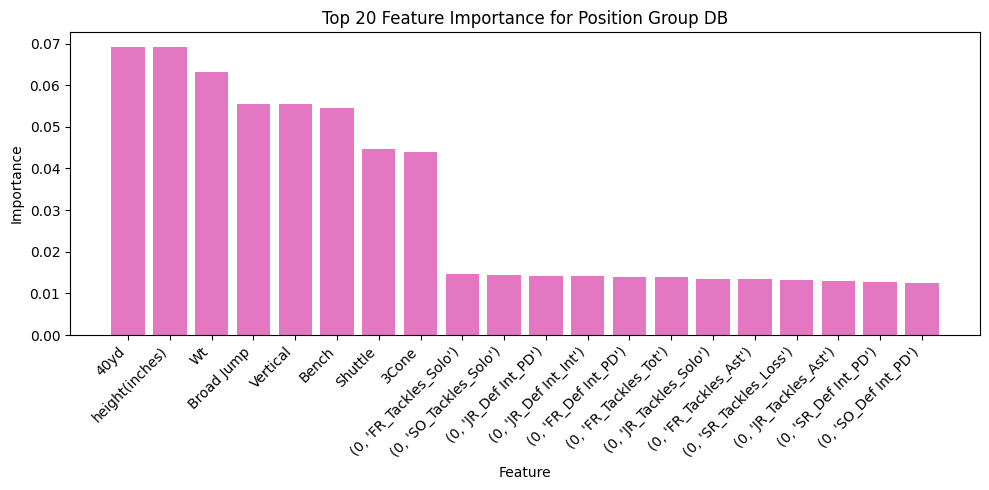

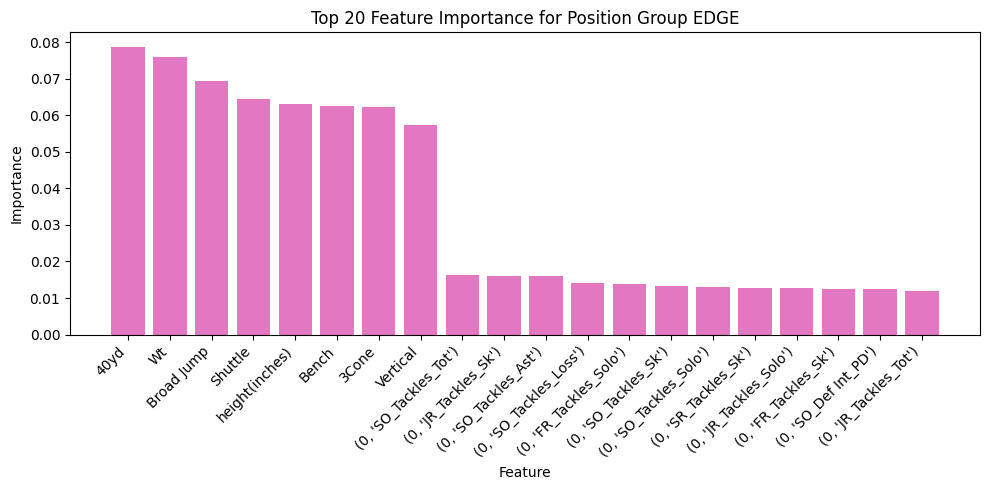

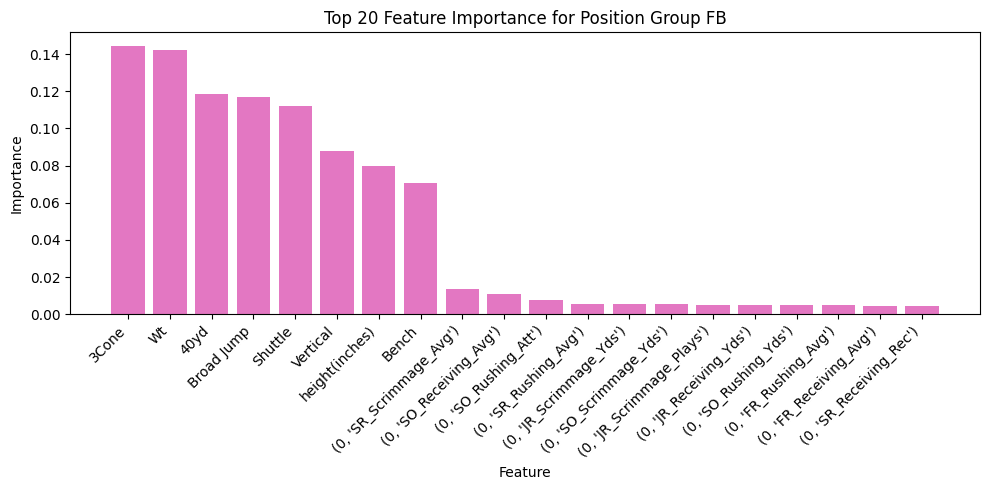

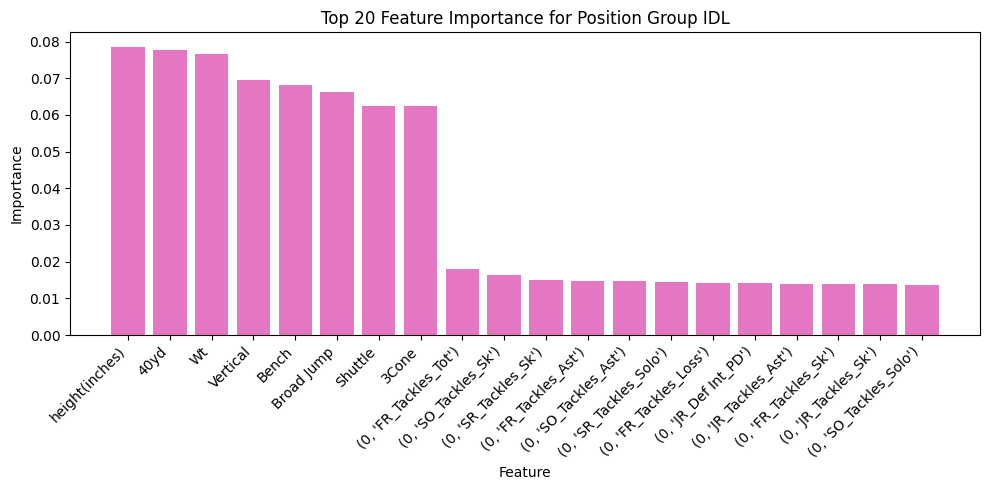

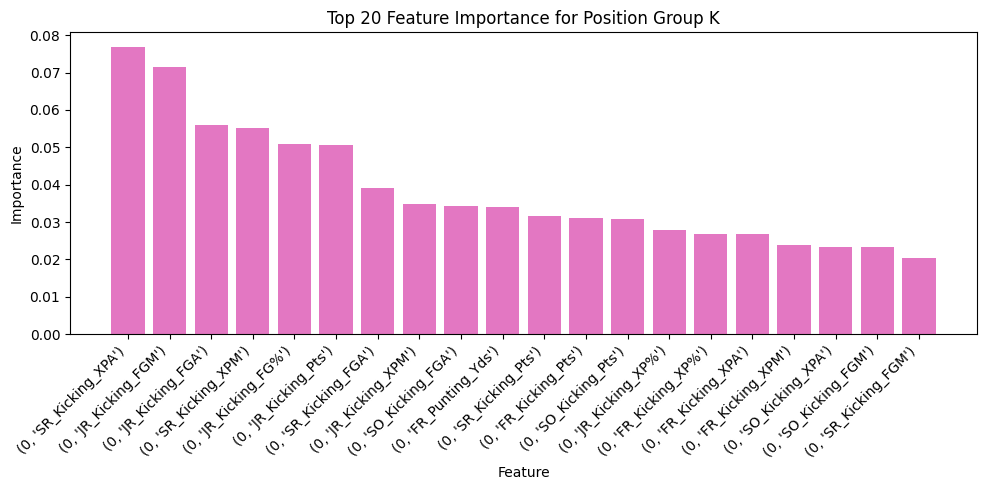

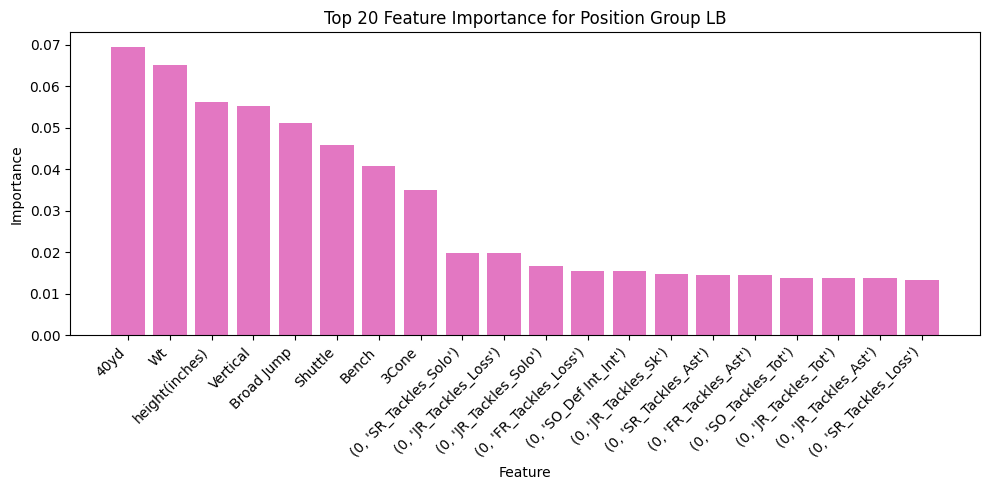

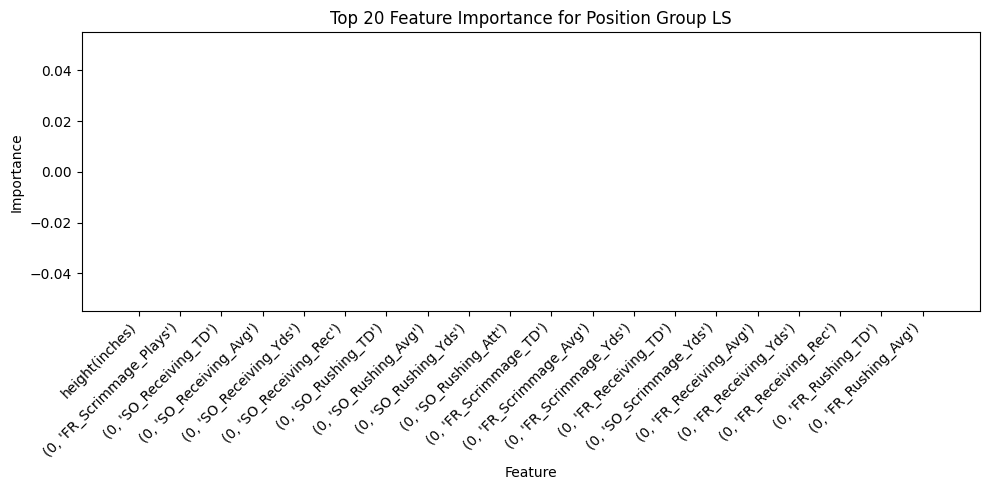

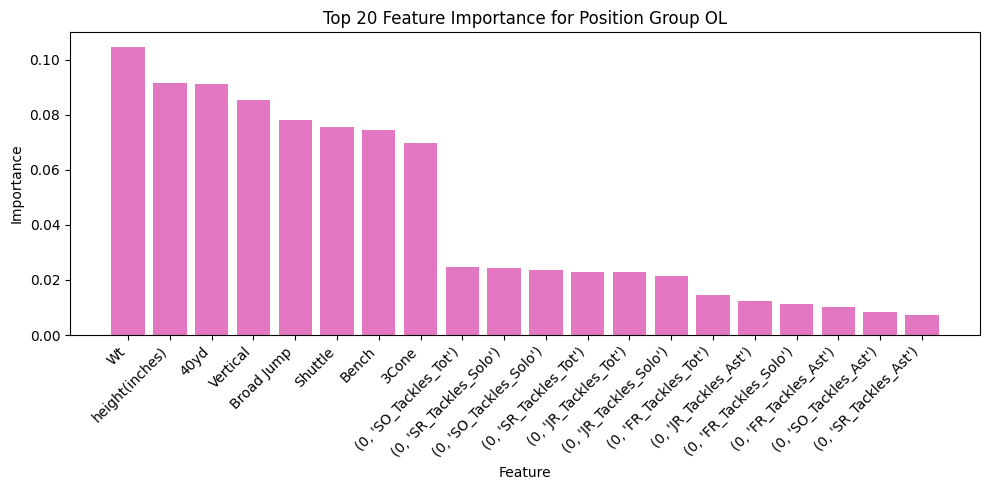

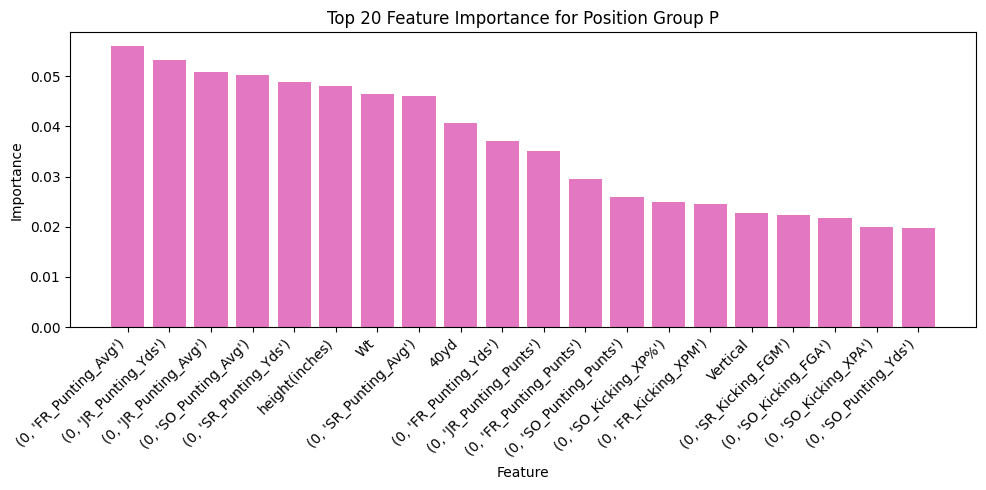

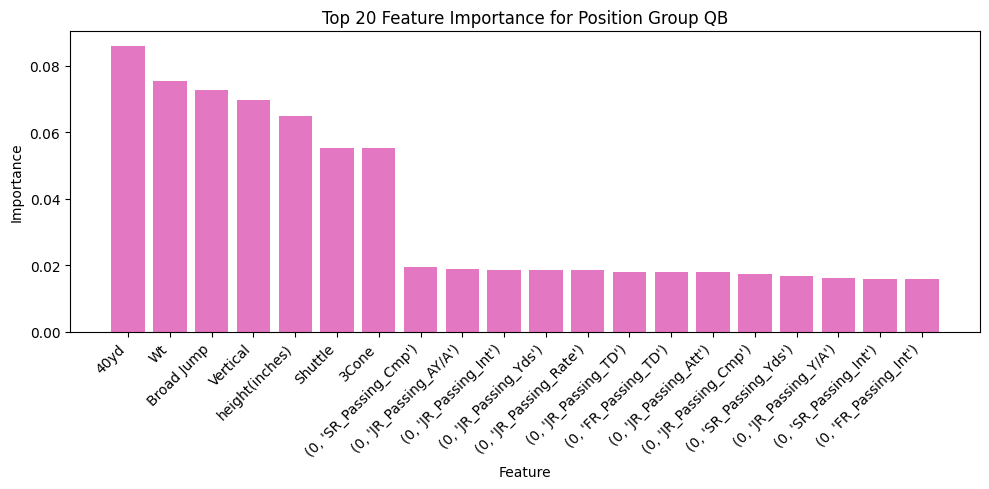

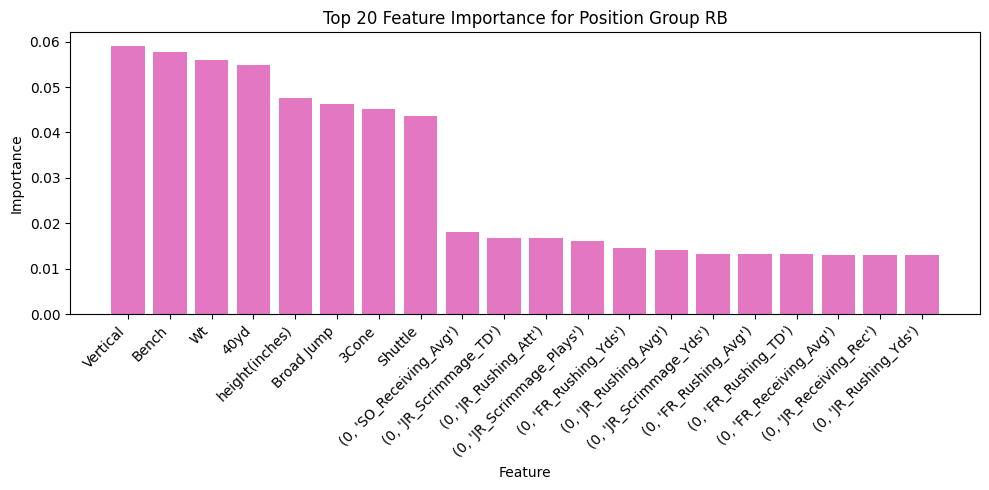

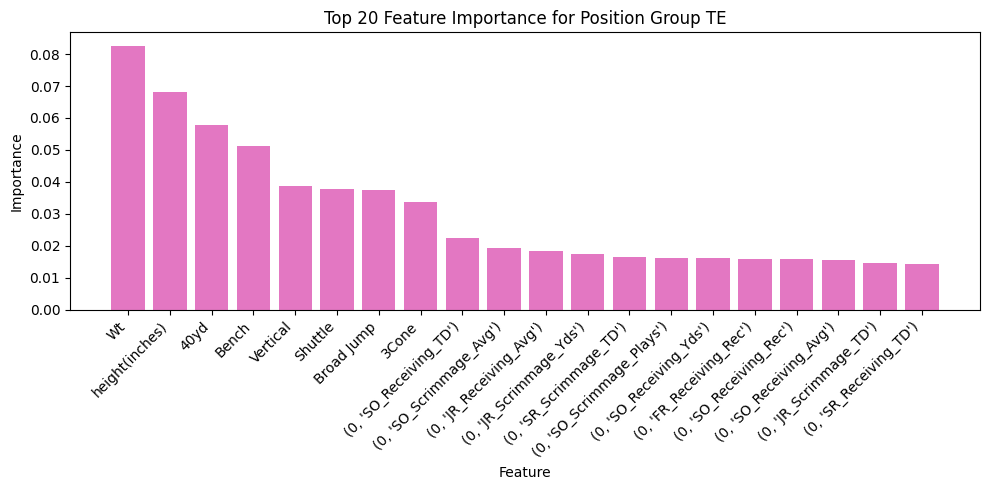

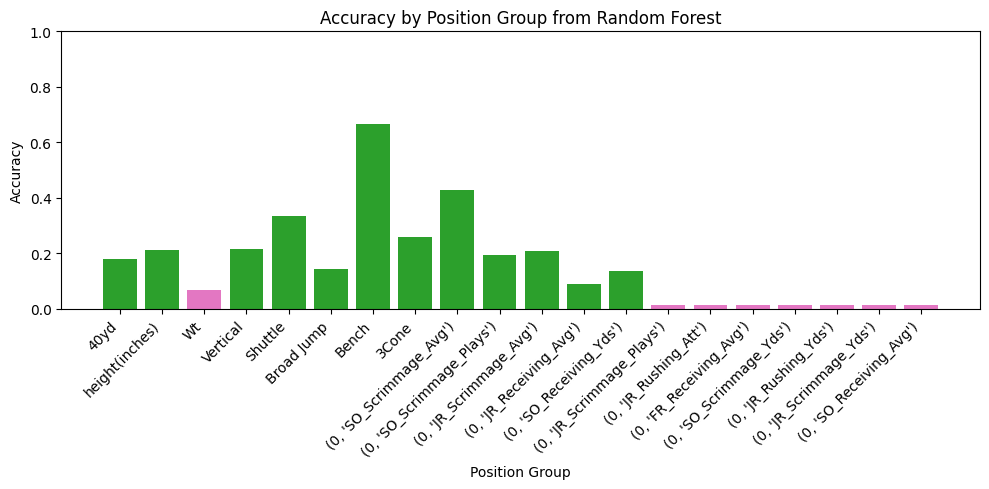

In [37]:
from sklearn.ensemble import RandomForestClassifier
accuracy_per_group = {}
position_groups = standardized_df.groupby(standardized_df.iloc[:, 4])
for position, group_df in position_groups:
    X = group_df.iloc[:, 31:]
    y = group_df.iloc[:, 0]
    if len(group_df) <= 1:
        print(f"Not enough samples for position group {position}. Skipping...")
        continue
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    feature_importances = model.feature_importances_
    y_pred = model.predict(X_test)
    # target_names = [f'Round {label}' for label in sorted(y_test.unique())]
    # data = {key: report[key] for key in report.keys() if key != 'accuracy'}
    # df = pd.DataFrame(data).transpose()
    # plt.figure(figsize=(10, 5))
    # sns.heatmap(df.iloc[:, :3], annot=True, cmap='YlGnBu', fmt=".2f")
    # plt.title(f'Classification Report for Support Vector {position}')
    # plt.show()
    plt.figure(figsize=(10, 5))
    top_features_indices = feature_importances.argsort()[-20:][::-1]  # Get indices of top 20 features
    top_features_importances = feature_importances[top_features_indices]
    top_features_names = group_df.columns[31:][top_features_indices]
    plt.bar(range(len(top_features_importances)), top_features_importances, color=tab10_palette[6])
    plt.xticks(range(len(top_features_importances)), top_features_names, rotation=45, ha='right')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(f'Top 20 Feature Importance for Position Group {position}')
    plt.tight_layout()
    plt.savefig(f'figs/Top_20_Feature_Importance_for_Position_Group_{position}.png')
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_per_group[position] = accuracy
plt.bar(list(accuracy_per_group.keys()), list(accuracy_per_group.values()), color=tab10_palette[2])
plt.xlabel('Position Group')
plt.ylabel('Accuracy')
plt.title('Accuracy by Position Group from Random Forest')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(f'figs/Accuracy_by_Position_Group_from_Random_Forest.png')